In [7]:
sys.path.insert(1,r'F:\Users\Kaggle\bulian')

In [8]:
import os,sys,torch
import pandas as pd

In [11]:
from bulian.Tabular.synthesizers import TwinSynthesizer,PrivateTwinSynthesizer
from bulian.metrics import *
from bulian.metrics.reports import *
from bulian.metrics import compute_metrics
from bulian.metrics.single_table import SingleTableMetric
from bulian.metrics.single_table import *

In [12]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [13]:
discrete_columns = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native-country",
    "income",
]

In [14]:
torch.cuda.is_available()

True

In [15]:
!nvidia-smi

Tue Jul  5 14:14:39 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 511.79       Driver Version: 511.79       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
|  0%   52C    P8    26W / 370W |    655MiB / 24576MiB |      5%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

###### 

## Normal API: Non-privately differentiable synthesizer

In [18]:
data = pd.read_csv(r"F:\Users\Kaggle\bulian\examples\csv\adult.csv")

In [19]:
data.head()

age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

In [20]:
synth = TwinSynthesizer(batch_size=200,device='cuda')   ### cpu else cuda

In [21]:
synth.fit(data=data,epochs=2,discrete_columns=discrete_columns)

Epoch: [0]  [  0/161]  eta: 1 day, 22:04:26  loss_g: 2.0152 (2.0152)  loss_d: 0.0114 (0.0114)  loss: 2.0265 (2.0265)  time: 1023.8646  data: 0.0000  max mem: 23
Epoch: [0]  [ 50/161]  eta: 0:37:31  loss_g: 1.6242 (1.8651)  loss_d: -0.7298 (-0.6467)  loss: 0.9193 (1.2184)  time: 0.0223  data: 0.0000  max mem: 28
Epoch: [0]  [100/161]  eta: 0:10:29  loss_g: 1.3359 (1.6862)  loss_d: -0.0395 (-0.4266)  loss: 1.3002 (1.2597)  time: 0.0234  data: 0.0000  max mem: 28
Epoch: [0]  [150/161]  eta: 0:01:21  loss_g: 0.6539 (1.4080)  loss_d: 0.2148 (-0.2268)  loss: 0.9219 (1.1812)  time: 0.0229  data: 0.0000  max mem: 28
Epoch: [0]  [161/161]  eta: 0:00:06  loss_g: 0.8438 (1.3792)  loss_d: 0.0023 (-0.2168)  loss: 0.8715 (1.1624)  time: 0.0227  data: 0.0000  max mem: 28
Epoch: [0] Total time: 0:17:07
Epoch: [1]  [  0/161]  eta: 0:00:07  loss_g: 0.7430 (0.7430)  loss_d: 0.0818 (0.0818)  loss: 0.8248 (0.8248)  time: 0.0469  data: 0.0000  max mem: 28
Epoch: [1]  [ 50/161]  eta: 0:00:02  loss_g: 0.3586 

In [27]:
sample = synth.sample(1000)

In [28]:
metrics = SingleTableMetric.get_subclasses()
numeric_features = ['capital-gain','capital-loss','hours-per-week']
discrete_columns = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native-country",
    "income",
]

In [29]:
metrics

{'BNLogLikelihood': bulian.metrics.single_table.bayesian_network.BNLogLikelihood,
 'LogisticDetection': bulian.metrics.single_table.detection.sklearn.LogisticDetection,
 'SVCDetection': bulian.metrics.single_table.detection.sklearn.SVCDetection,
 'BinaryDecisionTreeClassifier': bulian.metrics.single_table.efficacy.binary.BinaryDecisionTreeClassifier,
 'BinaryAdaBoostClassifier': bulian.metrics.single_table.efficacy.binary.BinaryAdaBoostClassifier,
 'BinaryLogisticRegression': bulian.metrics.single_table.efficacy.binary.BinaryLogisticRegression,
 'BinaryMLPClassifier': bulian.metrics.single_table.efficacy.binary.BinaryMLPClassifier,
 'MulticlassDecisionTreeClassifier': bulian.metrics.single_table.efficacy.multiclass.MulticlassDecisionTreeClassifier,
 'MulticlassMLPClassifier': bulian.metrics.single_table.efficacy.multiclass.MulticlassMLPClassifier,
 'LinearRegression': bulian.metrics.single_table.efficacy.regression.LinearRegression,
 'MLPRegressor': bulian.metrics.single_table.efficacy

In [30]:
compute_metrics(metrics,data, sample)

metric                                     name  \
0                    BNLogLikelihood           BayesianNetwork Log Likelihood   
1                  LogisticDetection             LogisticRegression Detection   
2                       SVCDetection                            SVC Detection   
3       BinaryDecisionTreeClassifier                                     None   
4           BinaryAdaBoostClassifier                                     None   
5           BinaryLogisticRegression                                     None   
6                BinaryMLPClassifier                                     None   
7   MulticlassDecisionTreeClassifier                                     None   
8            MulticlassMLPClassifier                                     None   
9                   LinearRegression                                     None   
10                      MLPRegressor                                     None   
11                   GMLogLikelihood           GaussianMixture Log Likelihood   
12                            CSTest                              Chi-Squared   
13                            KSTest  Inverted Kolmogorov-Smirnov D statistic   
14                    KSTestExtended  Inverted Kolmogorov-Smirnov D statistic   
15                    CategoricalCAP                           CategoricalCAP   
16                CategoricalZeroCAP                                     0CAP   
17         CategoricalGeneralizedCAP               Categorical GeneralizedCAP   
18                     CategoricalNB                Categorical NaiveBayesian   
19                    CategoricalKNN                      K-Nearest Neighbors   
20                     CategoricalRF                Categorical Random Forest   
21                    CategoricalSVM                Support Vector Classifier   
22               CategoricalEnsemble                                 Ensemble   
23                       NumericalLR              Numerical Linear Regression   
24                      NumericalMLP        Multi-layer Perceptron Regression   
25                      NumericalSVR      Numerical Support-vector Regression   
26    NumericalRadiusNearestNeighbor        Numerical Radius Nearest Neighbor   
27            ContinuousKLDivergence   Continuous Kullback–Leibler Divergence   
28              DiscreteKLDivergence     Discrete Kullback–Leibler Divergence   

       raw_score  normalized_score  min_value  max_value      goal  \
0            NaN               NaN       -inf        0.0  MAXIMIZE   
1   7.106902e-01          0.710690        0.0        1.0  MAXIMIZE   
2   7.941233e-01          0.794123        0.0        1.0  MAXIMIZE   
3            NaN               NaN        0.0        1.0  MAXIMIZE   
4            NaN               NaN        0.0        1.0  MAXIMIZE   
5            NaN               NaN        0.0        1.0  MAXIMIZE   
6            NaN               NaN        0.0        1.0  MAXIMIZE   
7            NaN               NaN        0.0        1.0  MAXIMIZE   
8            NaN               NaN        0.0        1.0  MAXIMIZE   
9            NaN               NaN       -inf        1.0  MAXIMIZE   
10           NaN               NaN       -inf        1.0  MAXIMIZE   
11 -7.039703e+07          0.000000       -inf        inf  MAXIMIZE   
12  9.748739e-01          0.974874        0.0        1.0  MAXIMIZE   
13  6.462961e-01          0.646296        0.0        1.0  MAXIMIZE   
14  8.147008e-01          0.814701        0.0        1.0  MAXIMIZE   
15           NaN               NaN        0.0        1.0  MAXIMIZE   
16           NaN               NaN        0.0        1.0  MAXIMIZE   
17           NaN               NaN        0.0        1.0  MAXIMIZE   
18           NaN               NaN        0.0        1.0  MAXIMIZE   
19           NaN               NaN        0.0        1.0  MAXIMIZE   
20           NaN               NaN        0.0        1.0  MAXIMIZE   
21           NaN               NaN        0.0        1.0  M

#### Report with privacy metrics

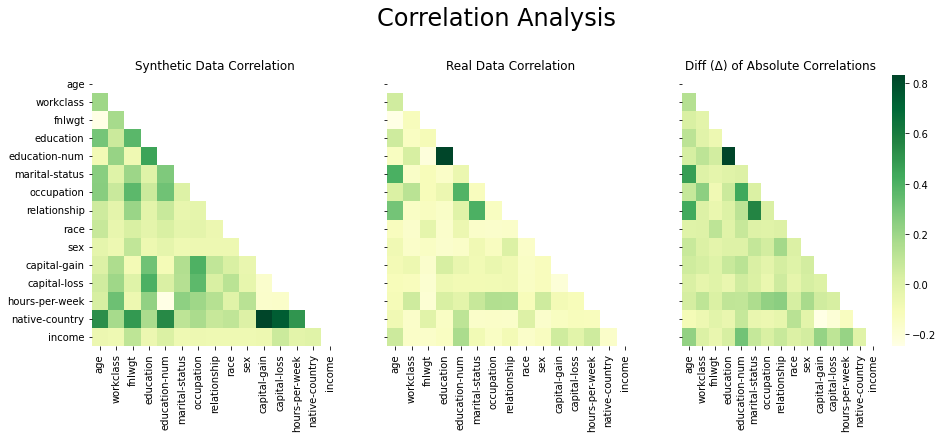

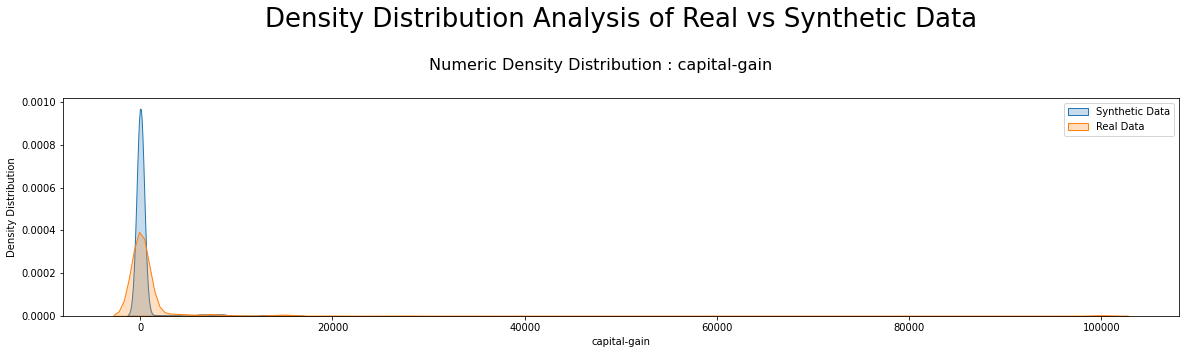

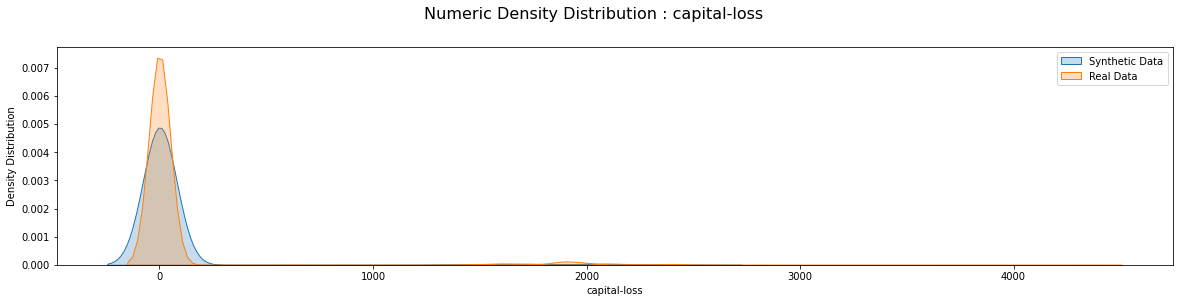

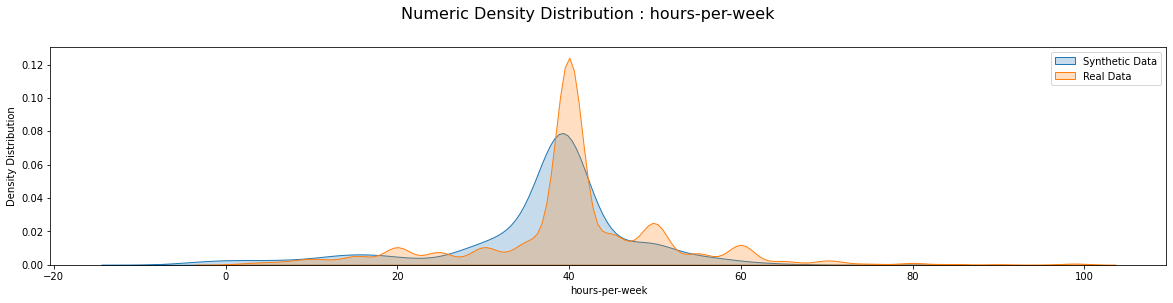

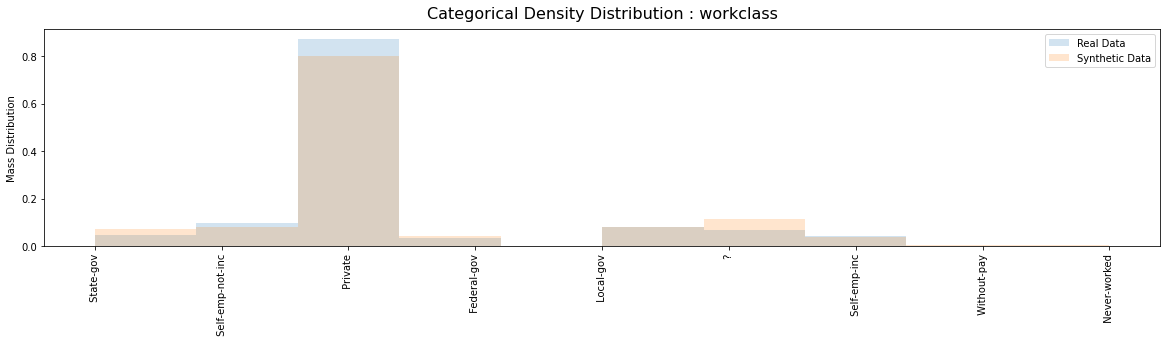

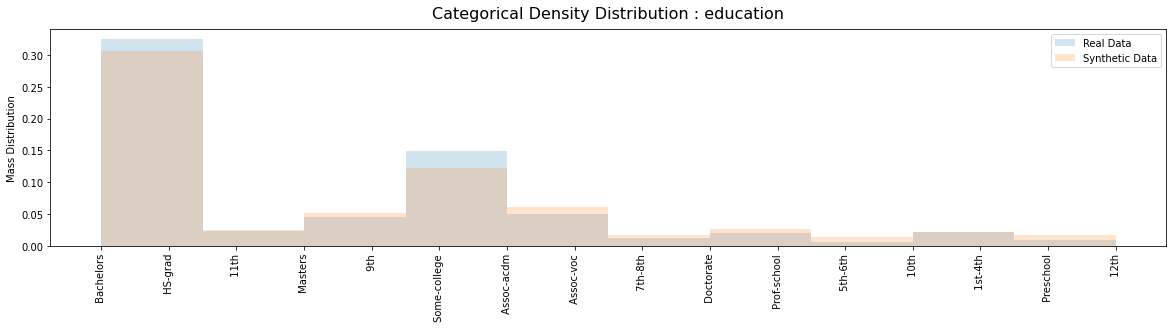

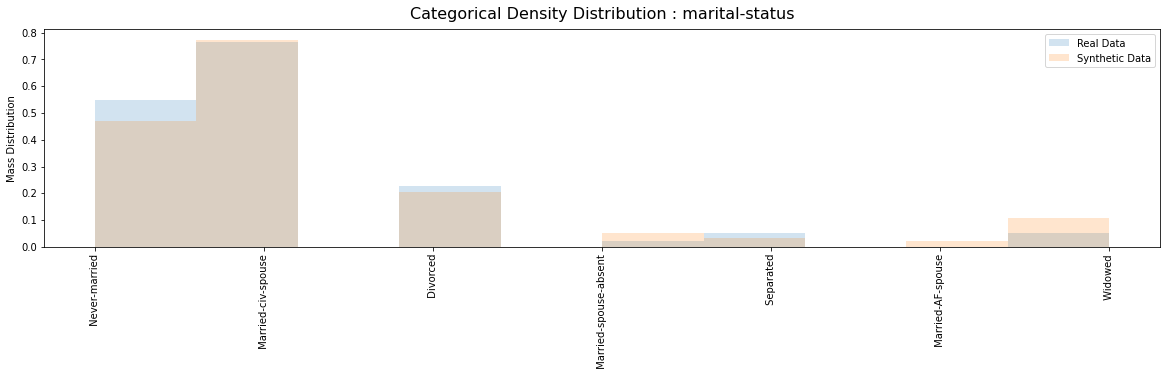

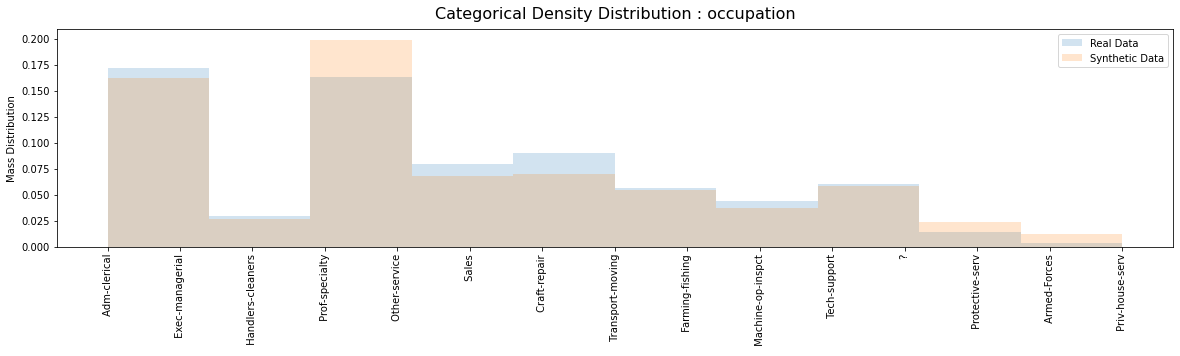

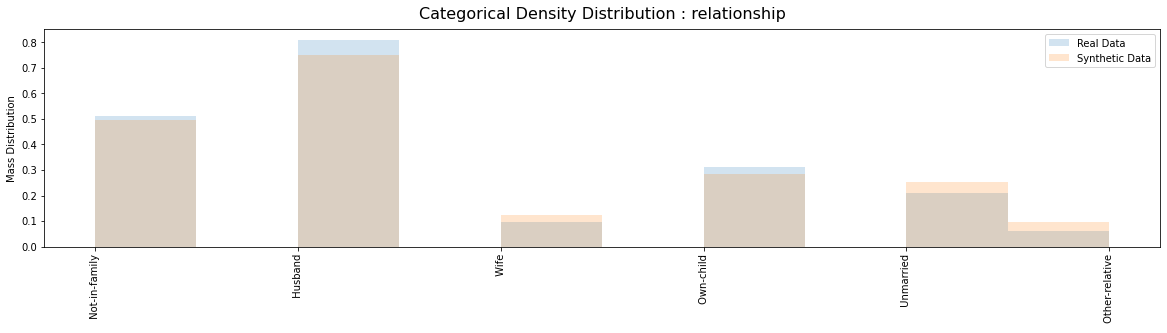

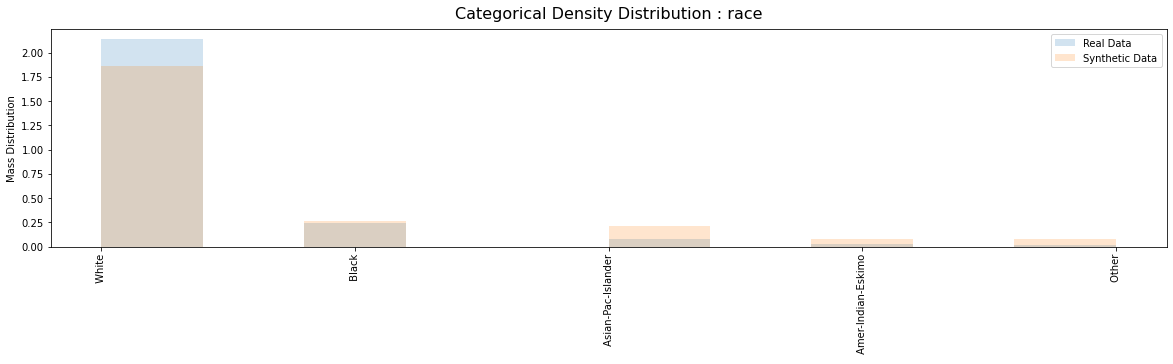

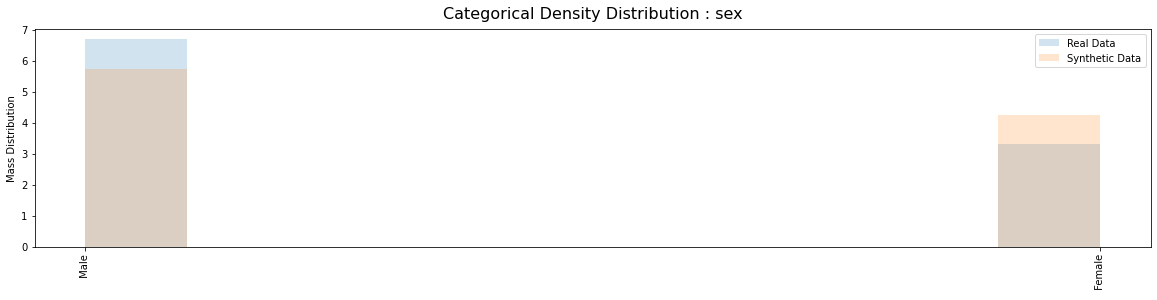

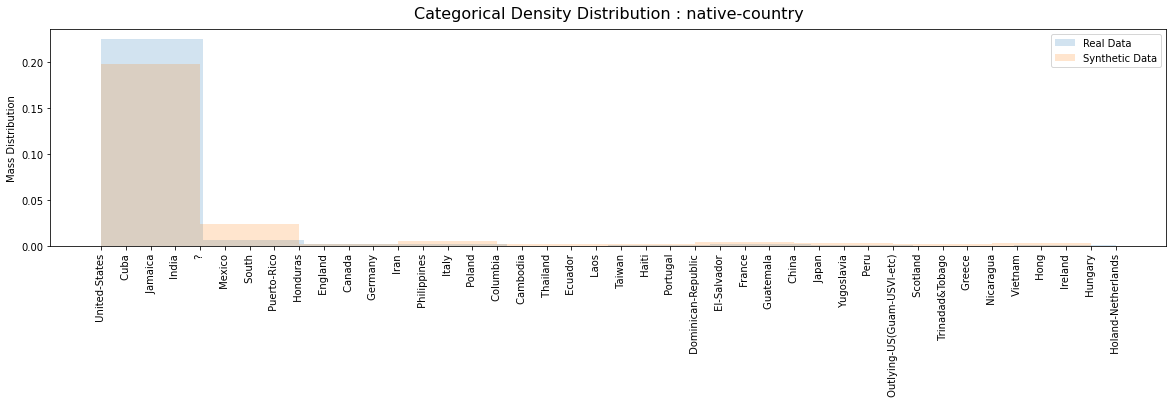

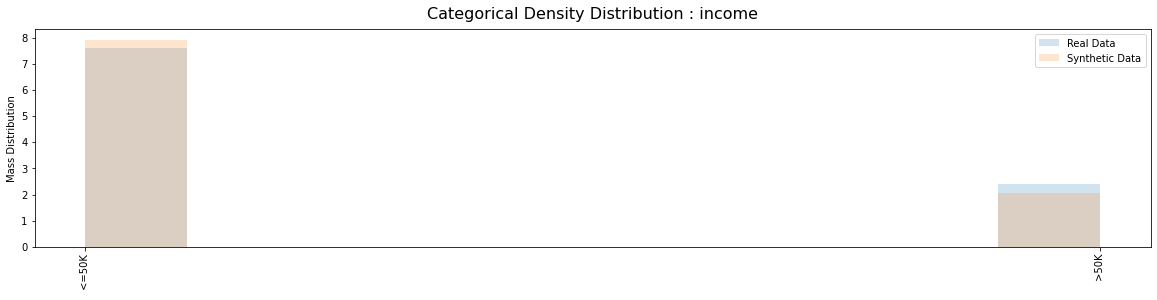

In [31]:
get_full_report(data, sample,discrete_columns,numeric_features, key_fields=['age','workclass','education'],sensitive_fields = ['income'])

#### Report without privacy metrics, but includes ML efficacy stuff

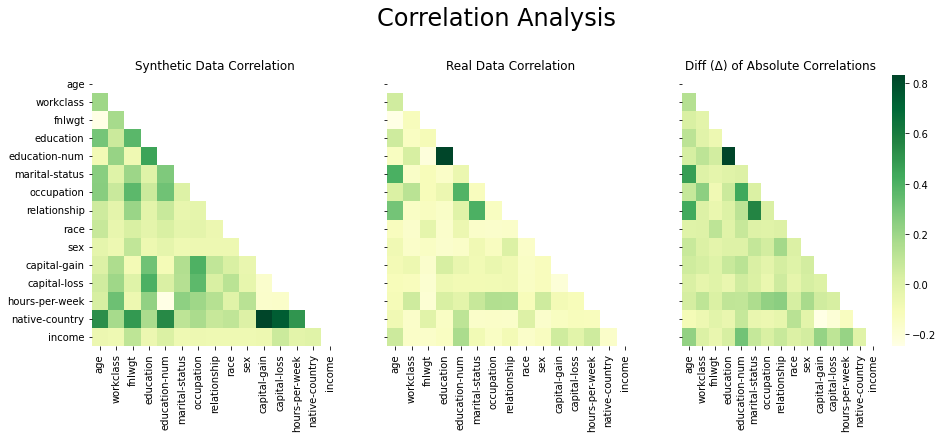

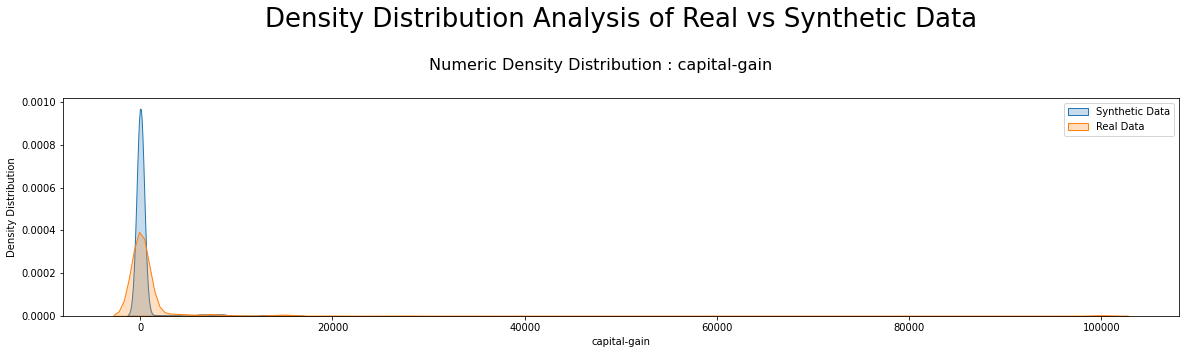

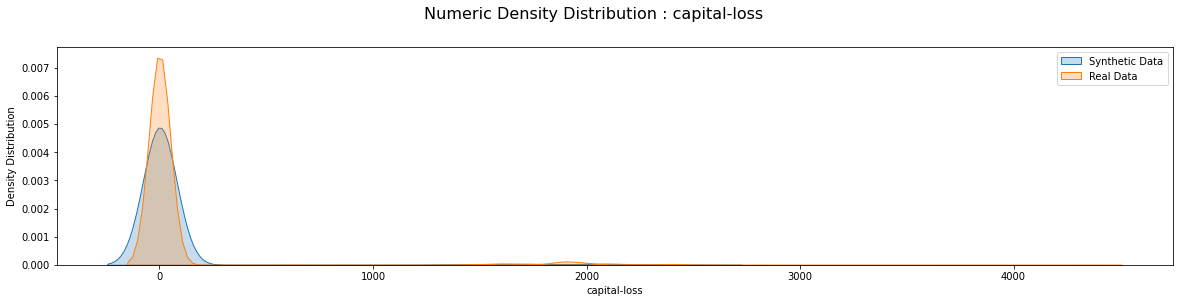

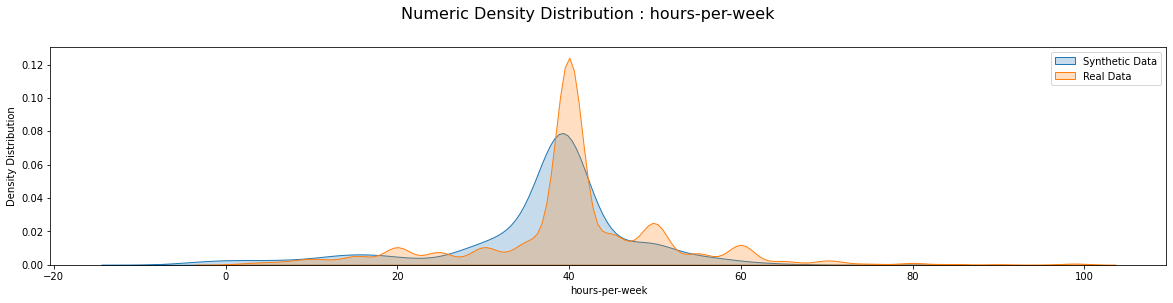

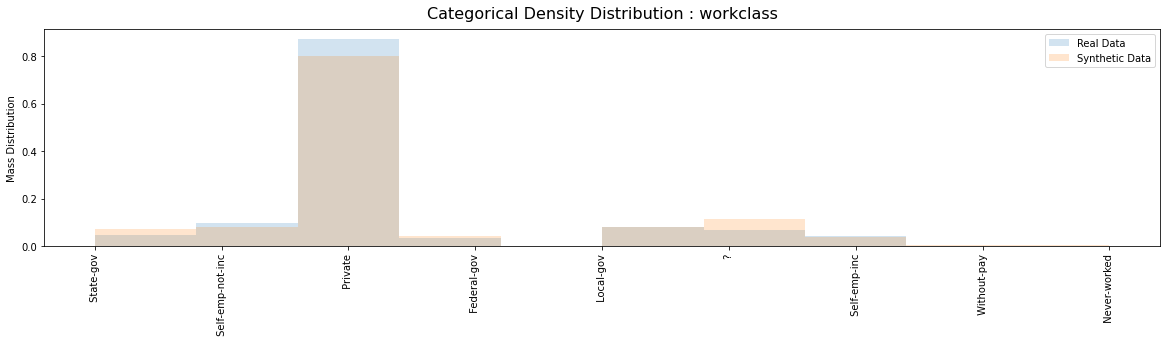

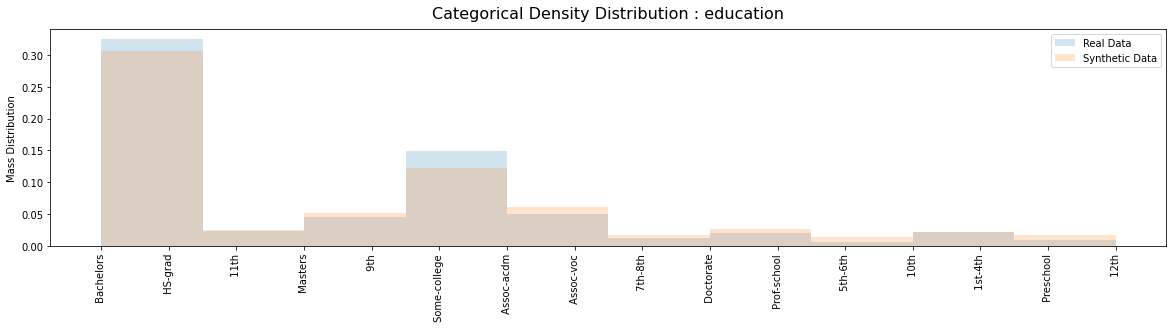

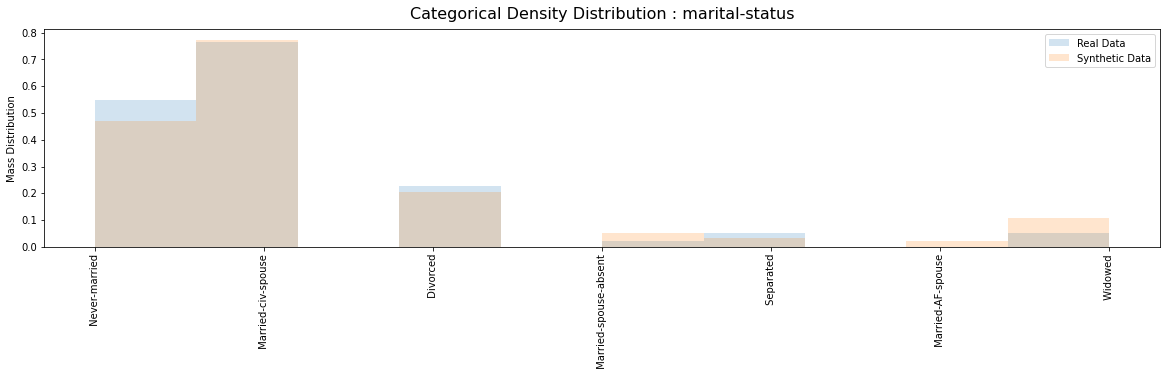

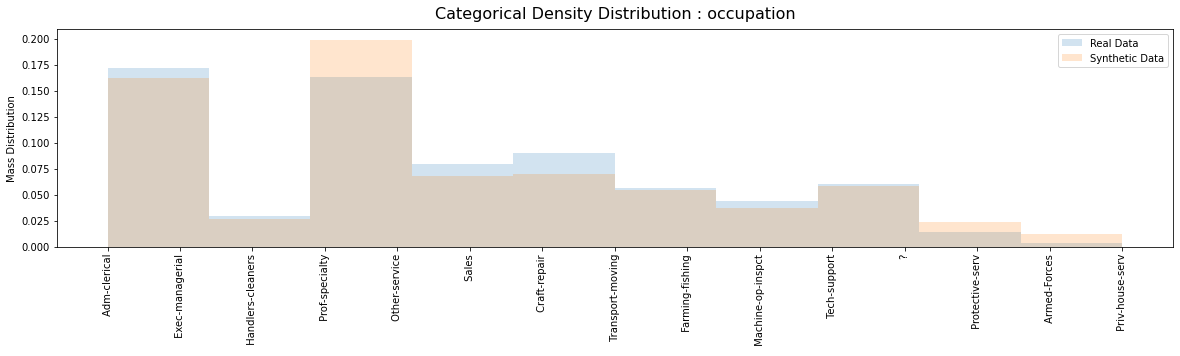

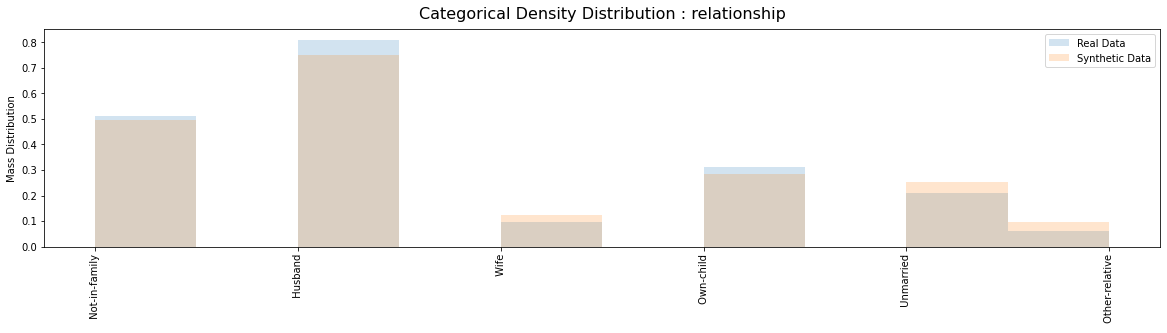

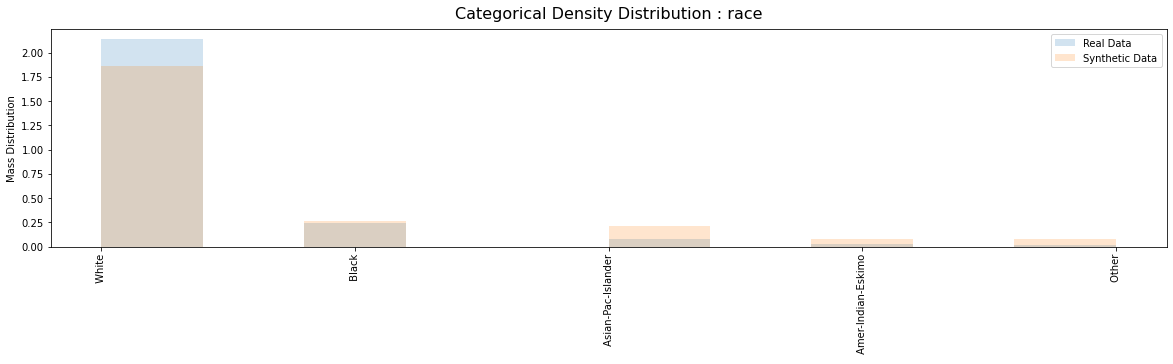

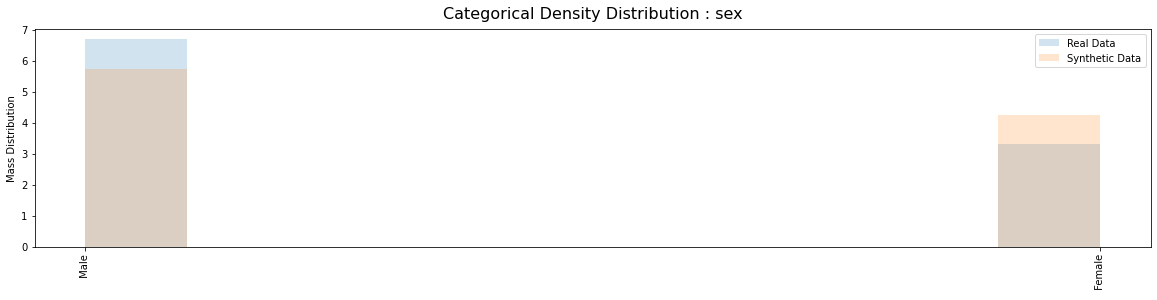

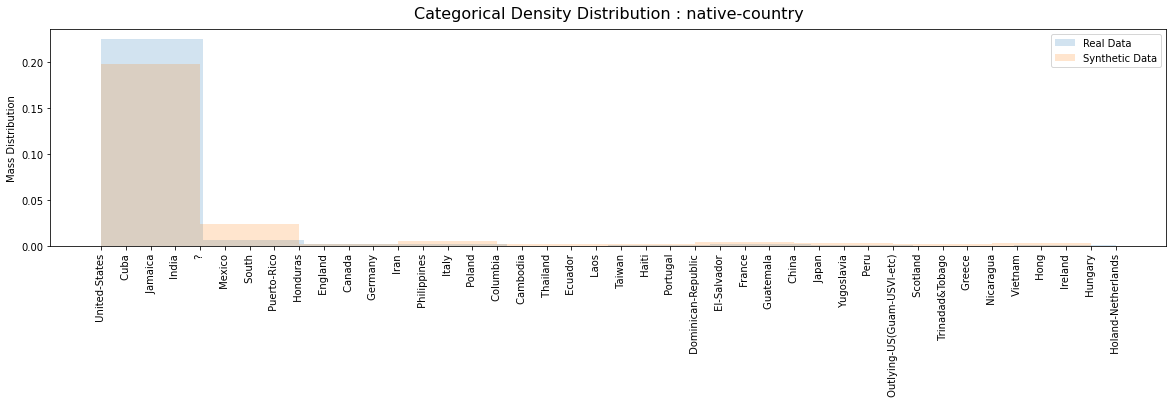

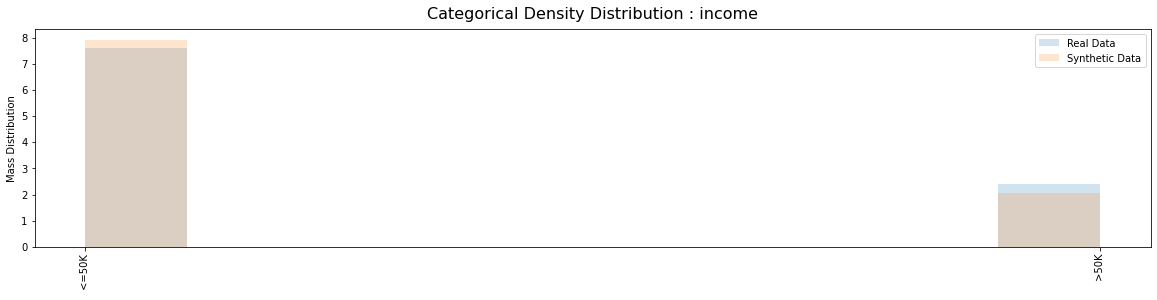

In [32]:
get_full_report(data, sample,discrete_columns,numeric_features,target='income')

#### Report without privacy metrics and without ML efficacy stuff

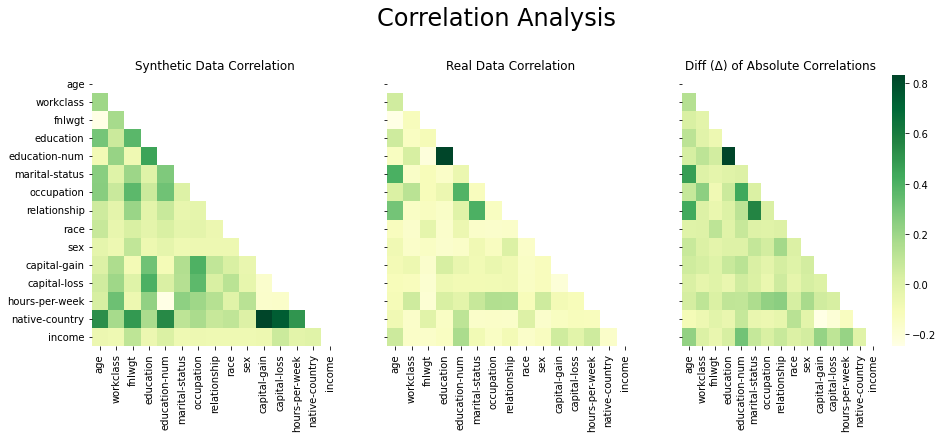

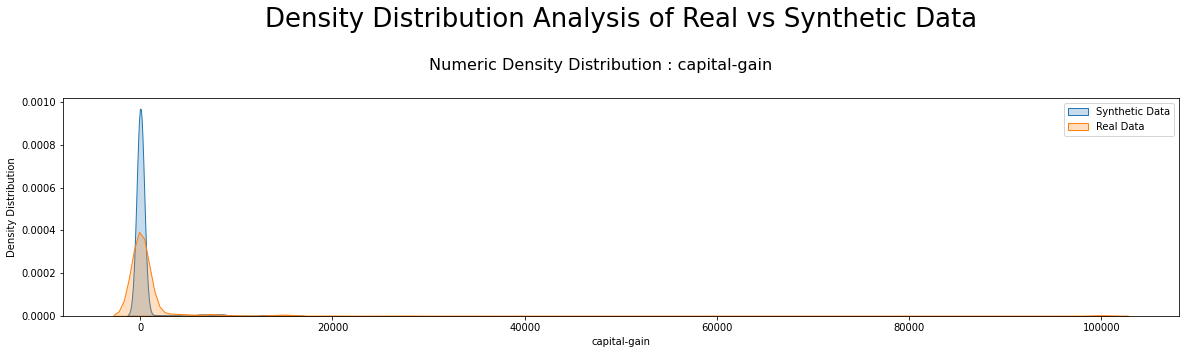

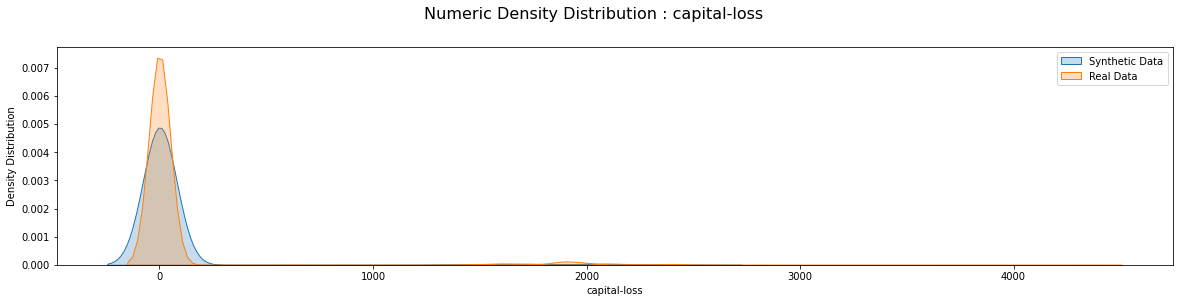

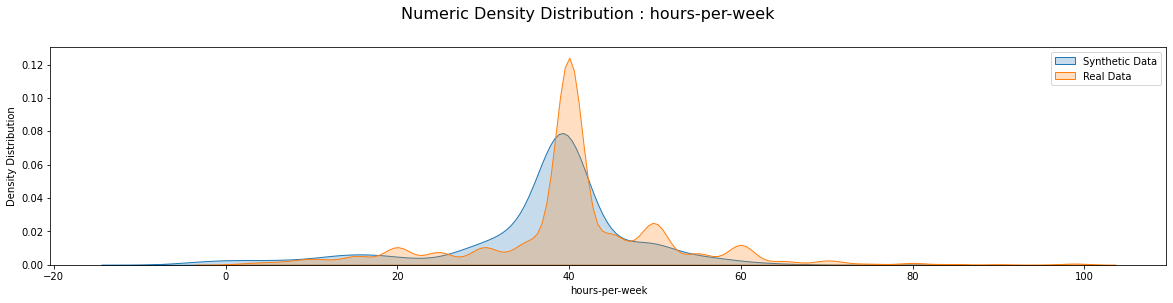

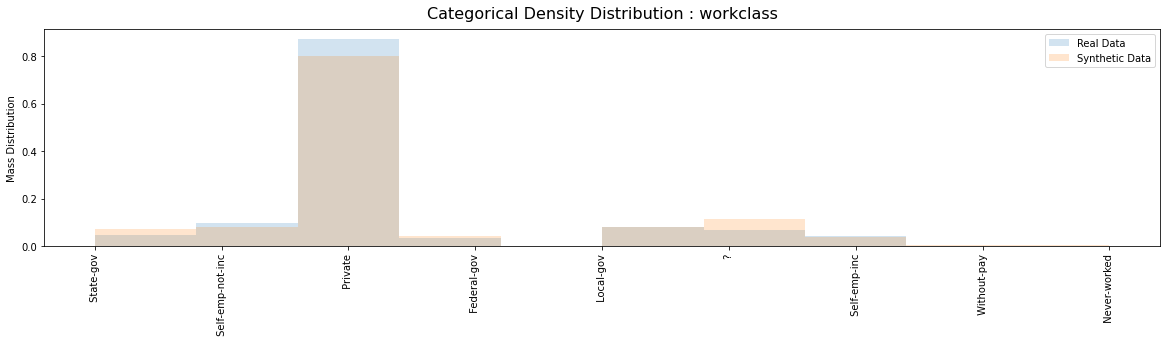

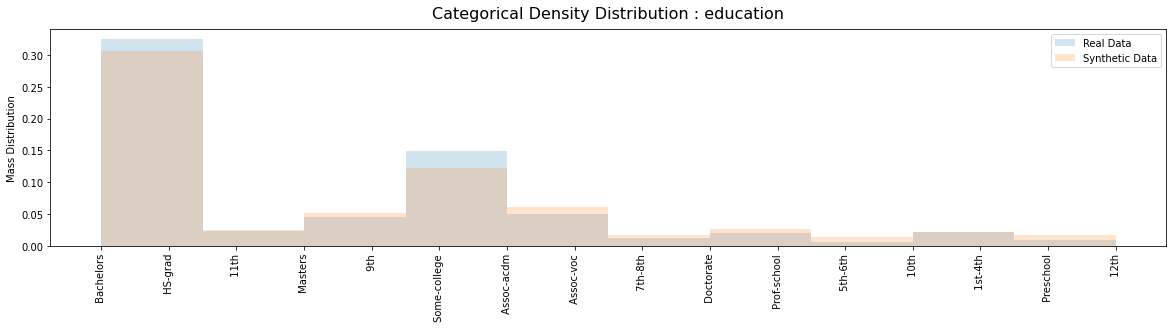

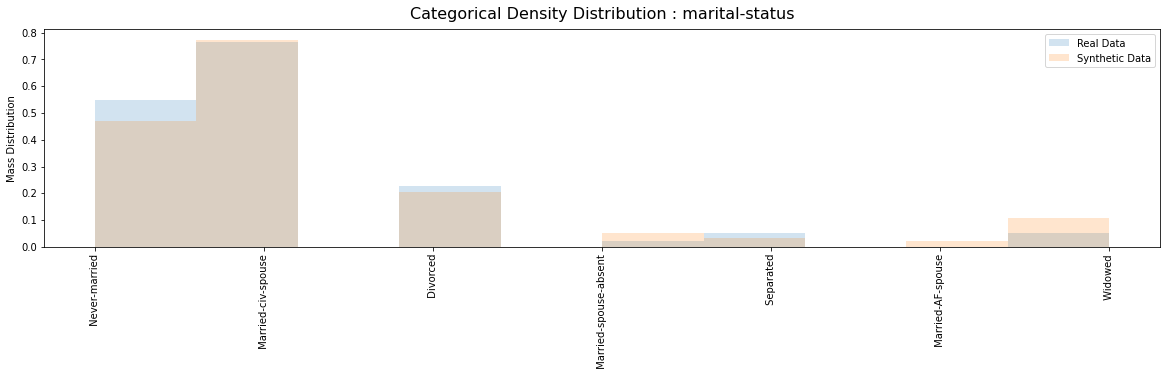

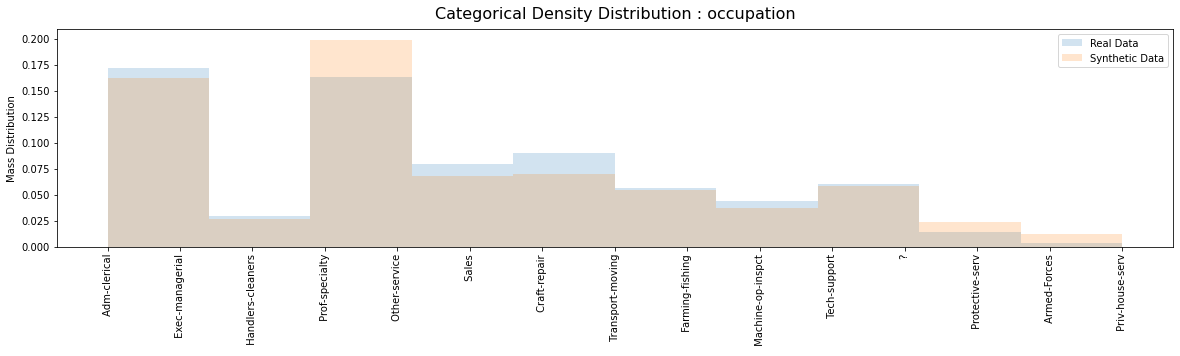

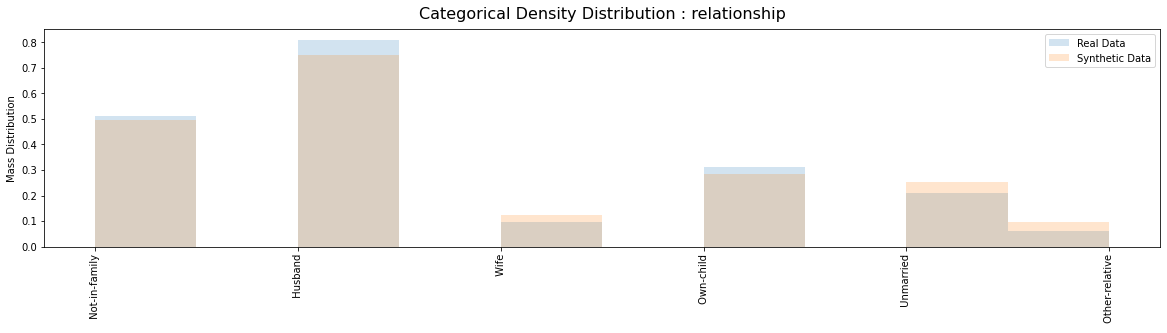

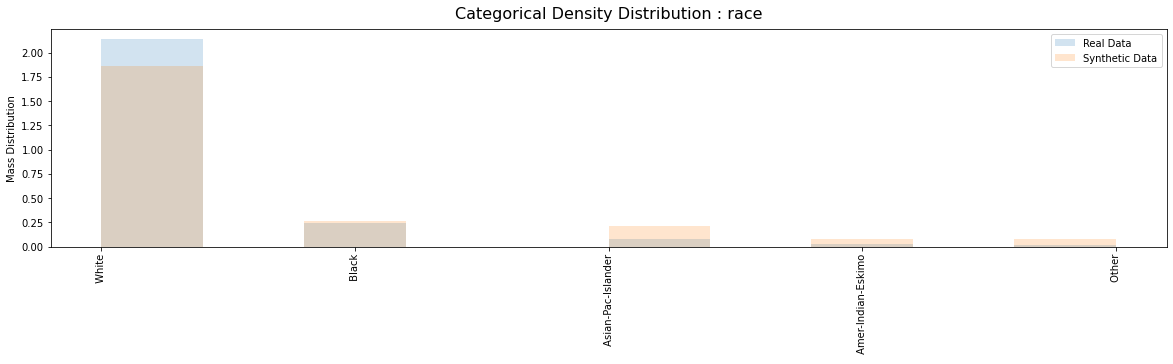

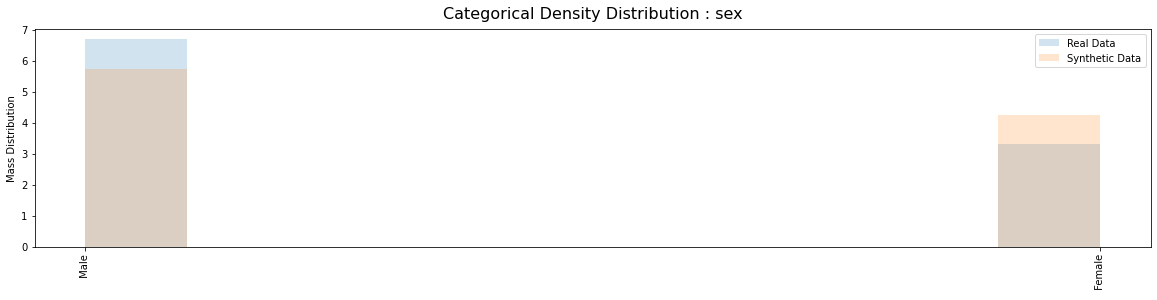

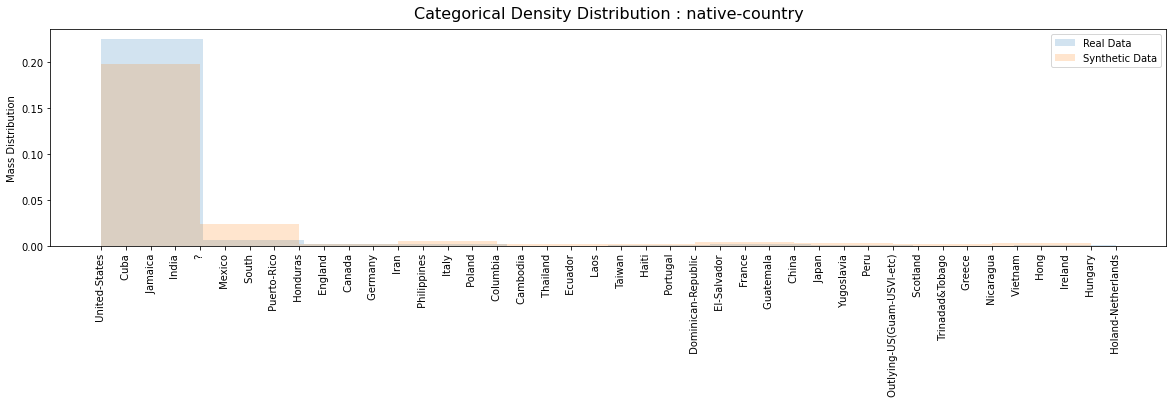

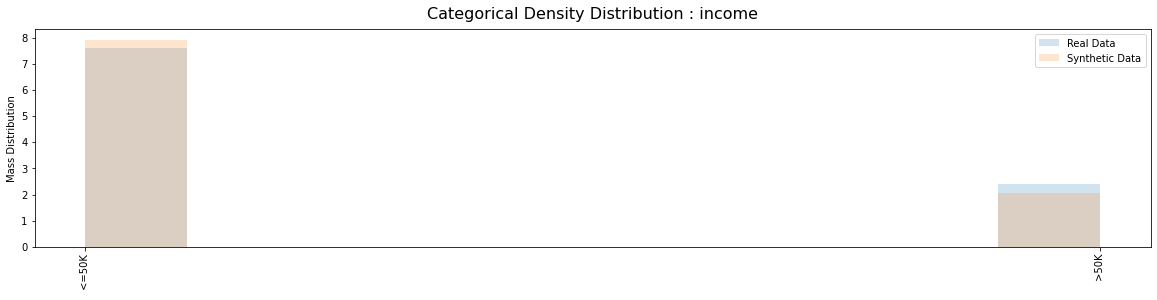

In [33]:
get_full_report(data, sample,discrete_columns,numeric_features)

#### Save model to disk

In [34]:
synth.save('F:/Users/Kaggle/wids/NormalAPI.pth')

#### 

## Adversarial API: Non-privately differentiable synthesizer

In [35]:
synth = TwinSynthesizer(batch_size=200,device='cpu')   ### cpu else cuda

In [36]:
synth.fit_adversarial(data=data,epochs=2,discrete_columns=discrete_columns,test_pct=0.33)

Generating train and test splits ...
TRAIN SAMPLES: n=21815
TEST SAMPLES: n=10746
Epoch: [0]  [  0/108]  eta: 0:00:11  loss_g: 2.0470 (2.0470)  loss_d: 0.0099 (0.0099)  loss: 2.0569 (2.0569)  time: 0.1019  data: 0.0000  max mem: 28
Epoch: [0]  [ 50/108]  eta: 0:00:03  loss_g: 1.4596 (1.7563)  loss_d: -0.6400 (-0.5712)  loss: 0.7712 (1.1851)  time: 0.0590  data: 0.0000  max mem: 28
Epoch: [0]  [100/108]  eta: 0:00:00  loss_g: 1.3449 (1.5776)  loss_d: 0.1086 (-0.3524)  loss: 1.4428 (1.2252)  time: 0.0591  data: 0.0000  max mem: 28
Epoch: [0]  [108/108]  eta: 0:00:00  loss_g: 1.3631 (1.5628)  loss_d: 0.1275 (-0.3164)  loss: 1.5158 (1.2465)  time: 0.0560  data: 0.0000  max mem: 28
Epoch: [0] Total time: 0:00:06
Epoch: [1]  [  0/108]  eta: 0:00:05  loss_g: 1.0532 (1.0532)  loss_d: 0.1013 (0.1013)  loss: 1.1544 (1.1544)  time: 0.0491  data: 0.0000  max mem: 28
Epoch: [1]  [ 50/108]  eta: 0:00:03  loss_g: 1.0027 (1.0829)  loss_d: 0.1507 (0.1312)  loss: 1.1387 (1.2141)  time: 0.0550  data: 0.0

In [37]:
sample = synth.sample_adversarial(data,1000)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [38]:
metrics = SingleTableMetric.get_subclasses()
numeric_features = ['capital-gain','capital-loss','hours-per-week']
discrete_columns = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native-country",
    "income",
]

#### Report with privacy metrics

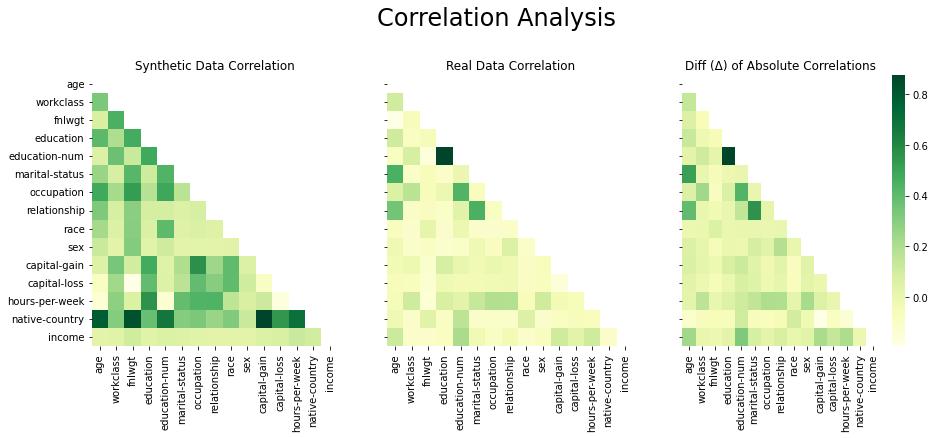

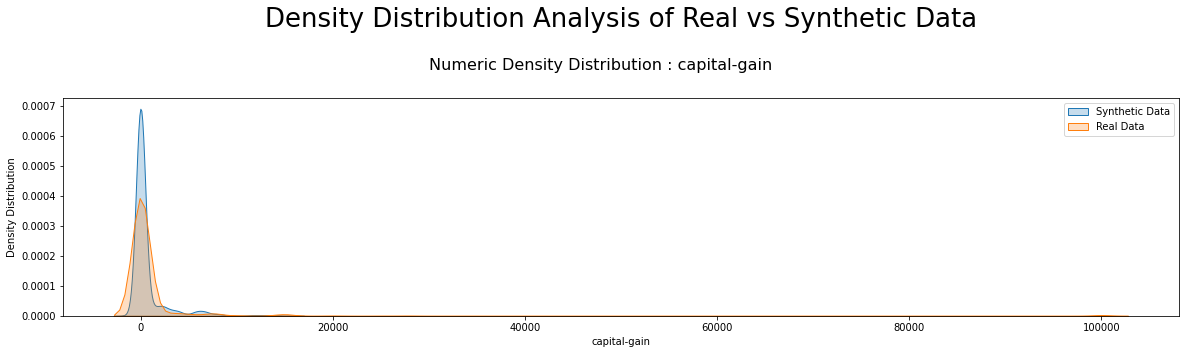

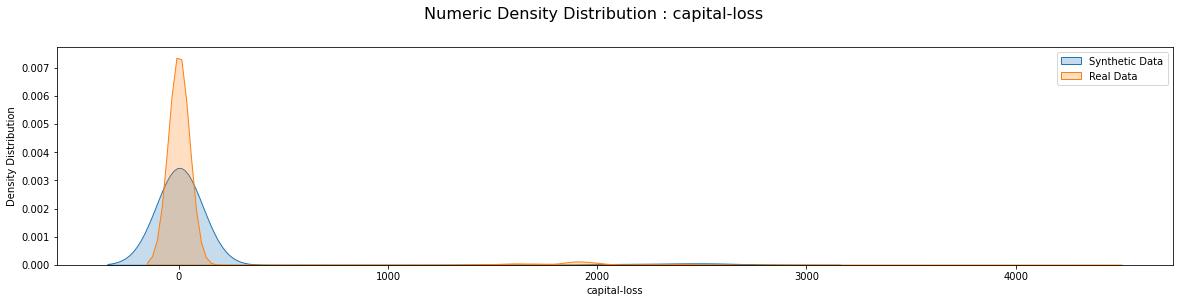

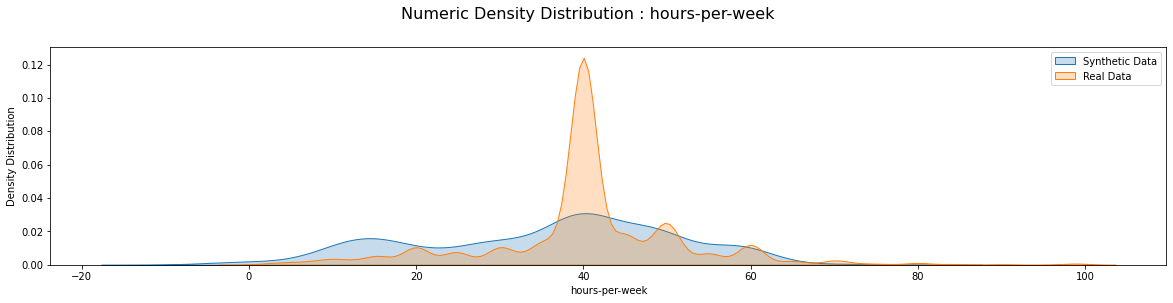

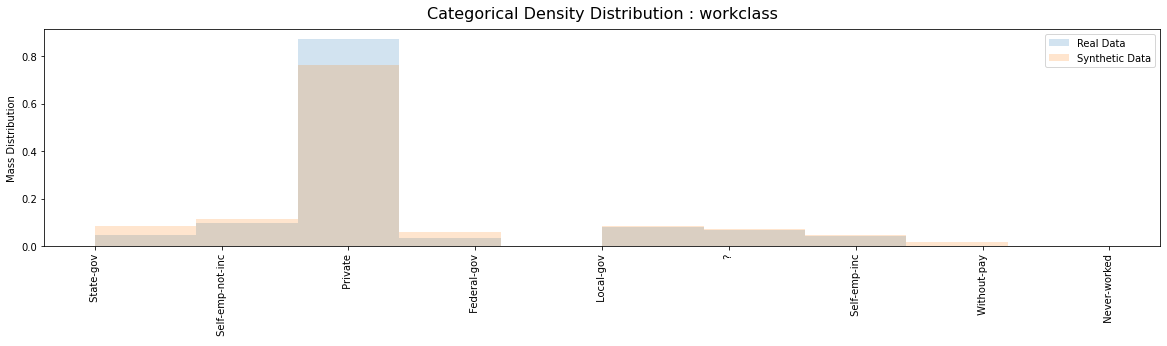

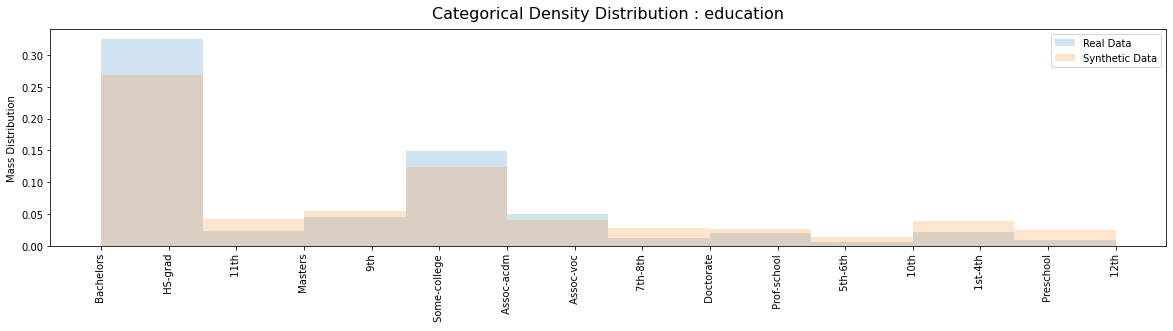

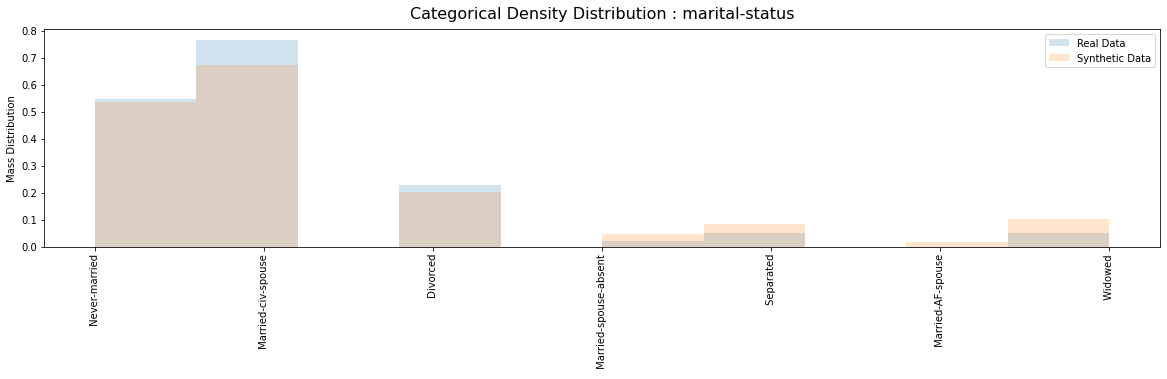

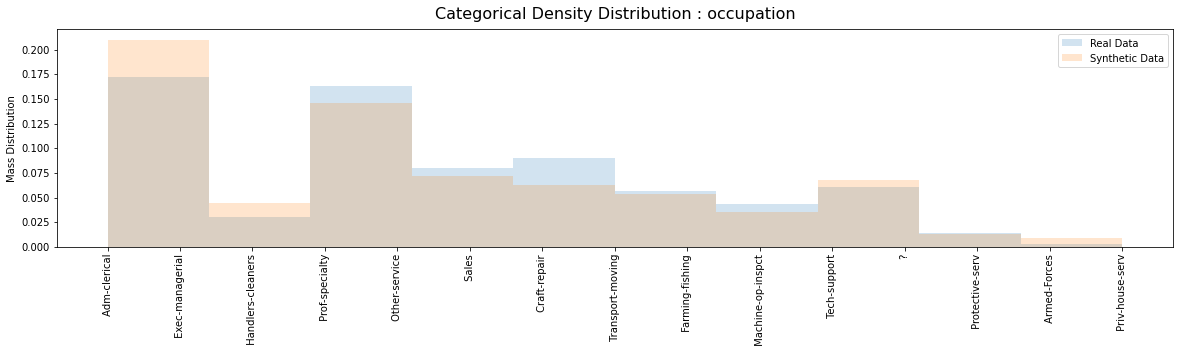

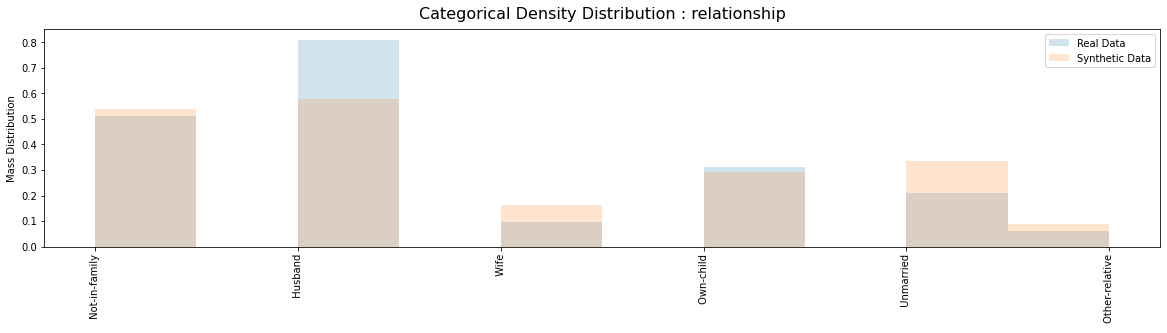

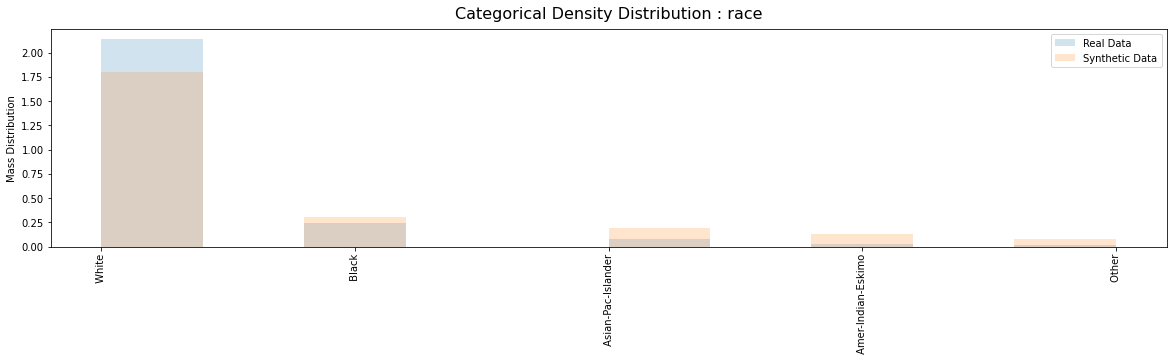

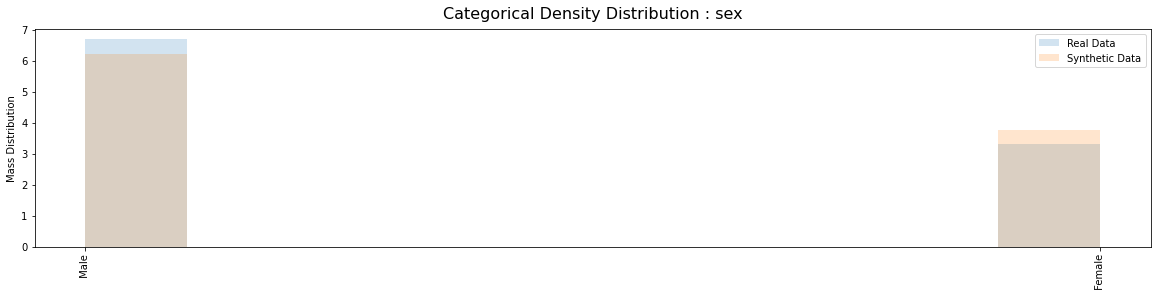

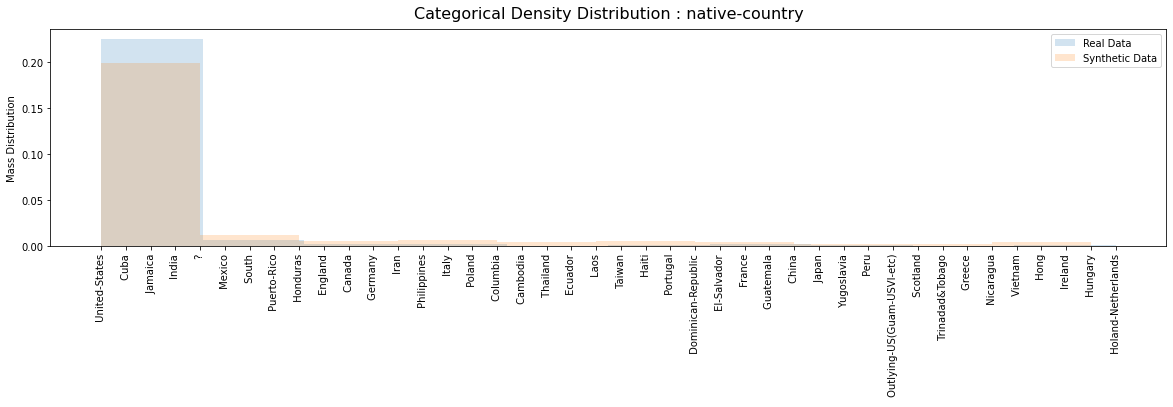

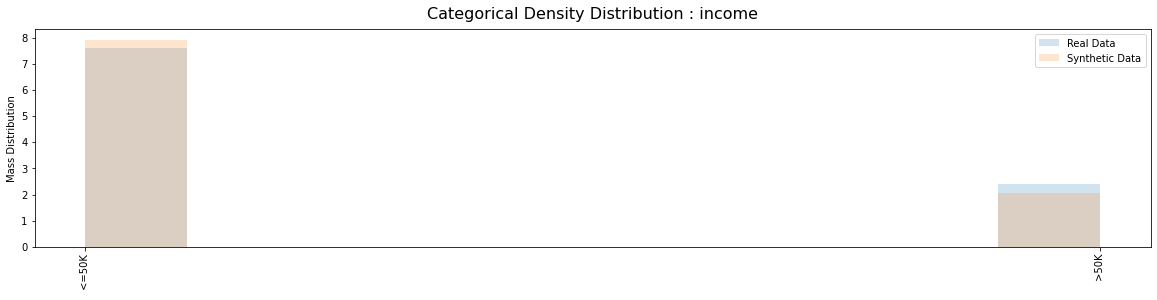

In [26]:
get_full_report(data, sample,discrete_columns,numeric_features, key_fields=['age','workclass','education'],sensitive_fields = ['income'])

#### Report without privacy metrics, but includes ML efficacy stuff

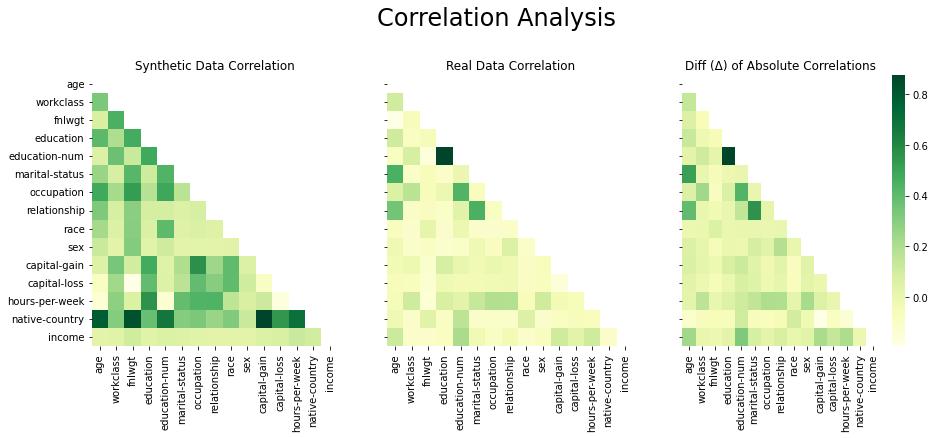

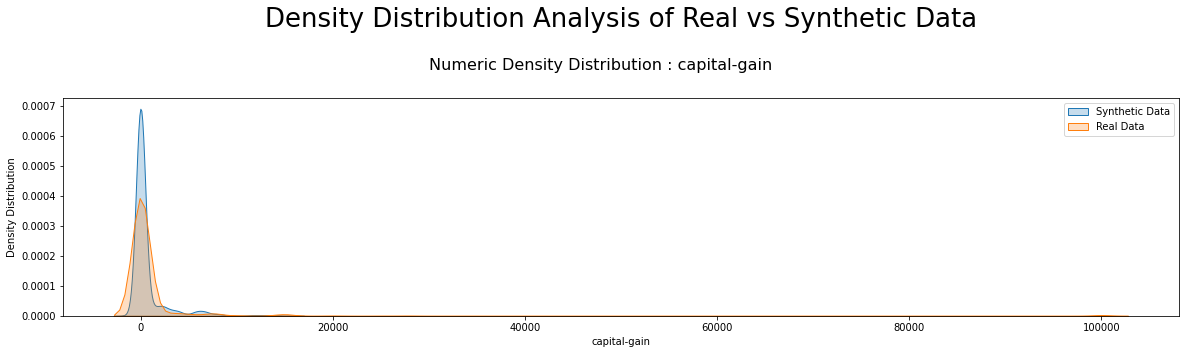

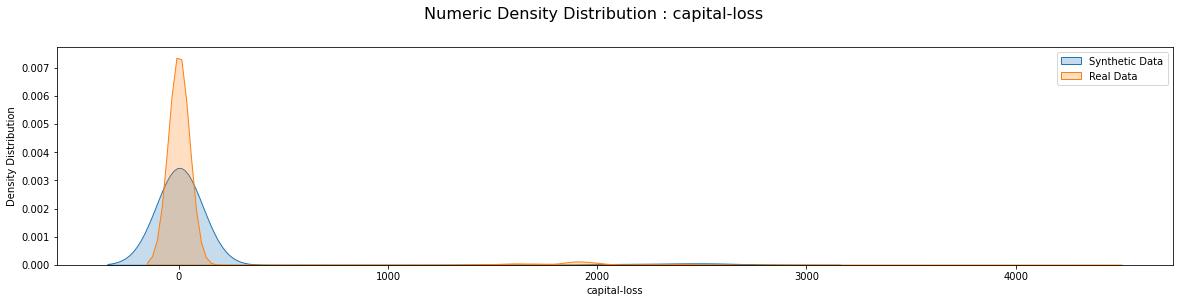

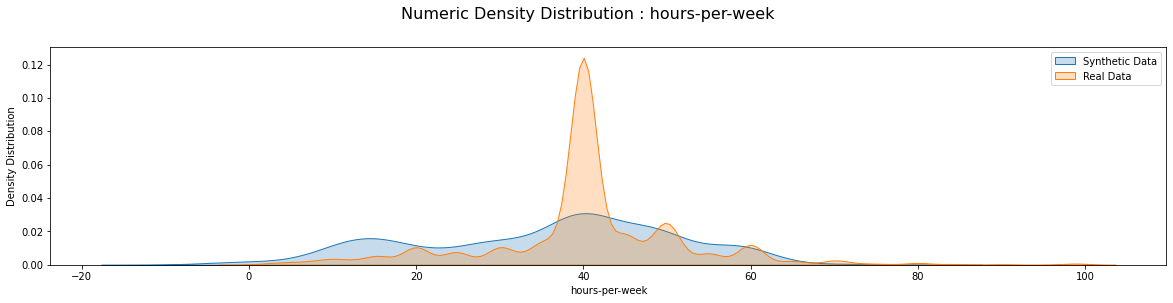

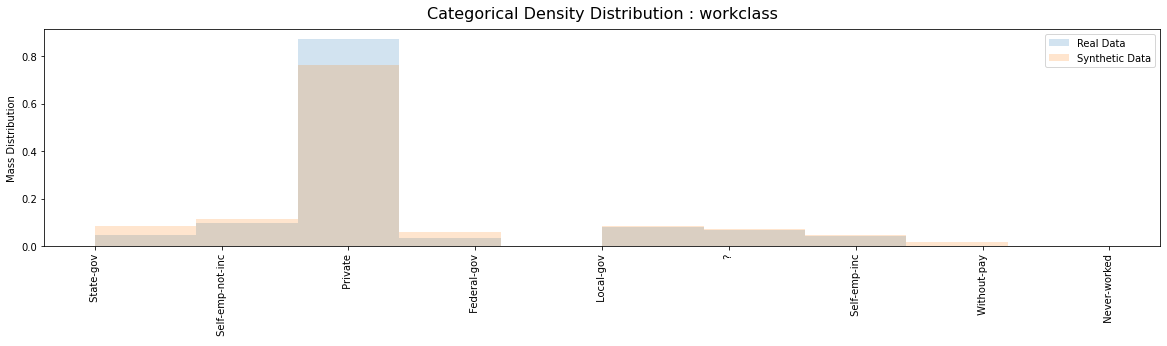

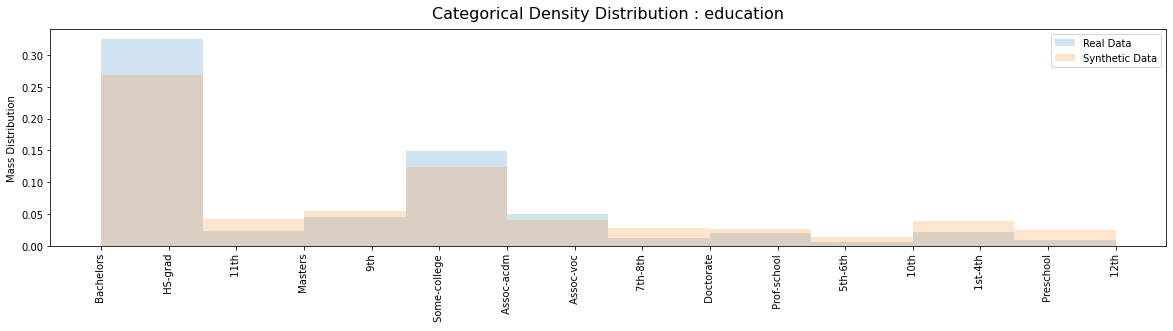

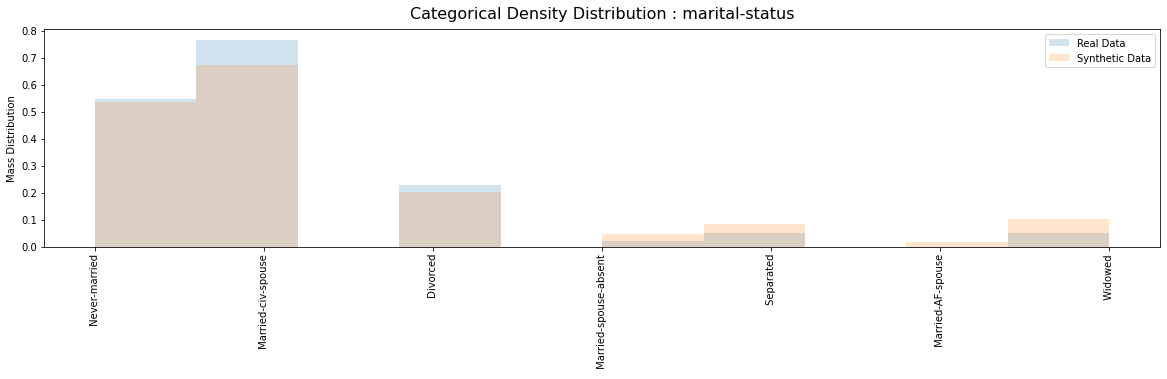

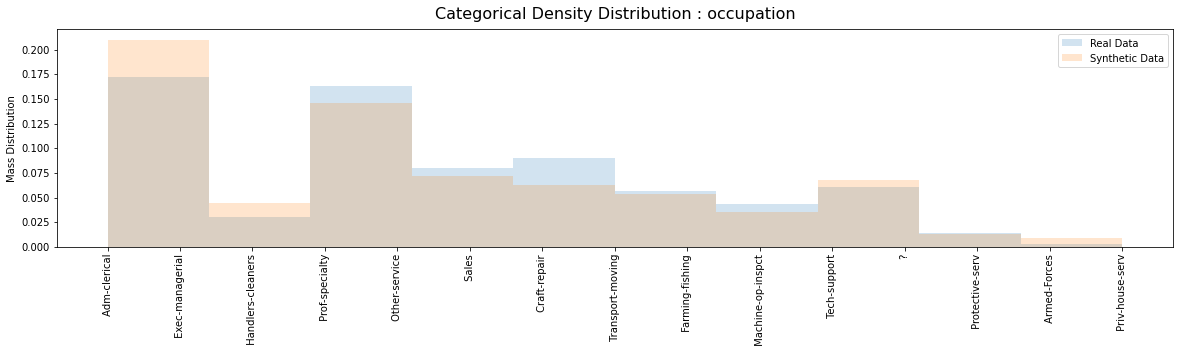

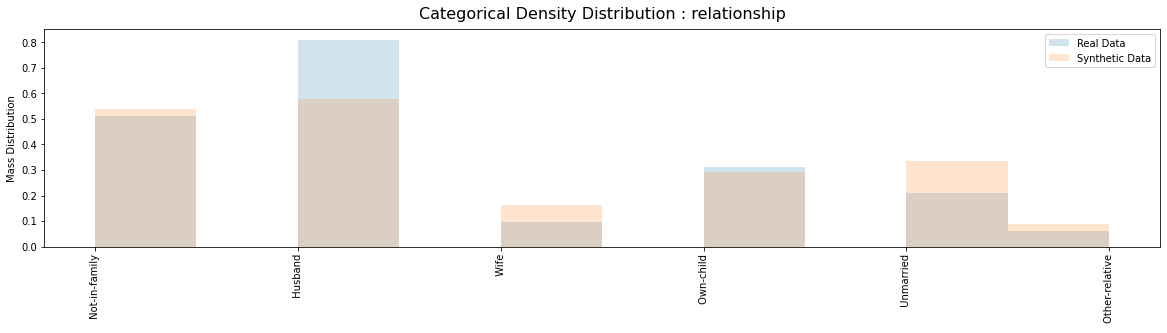

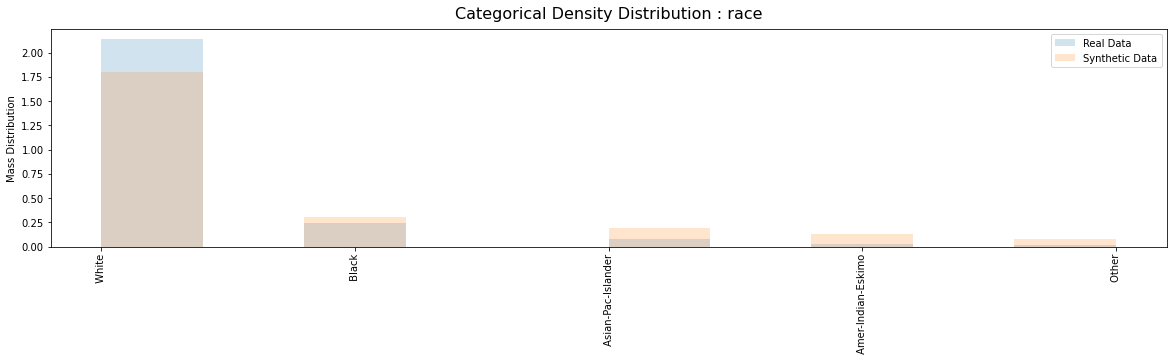

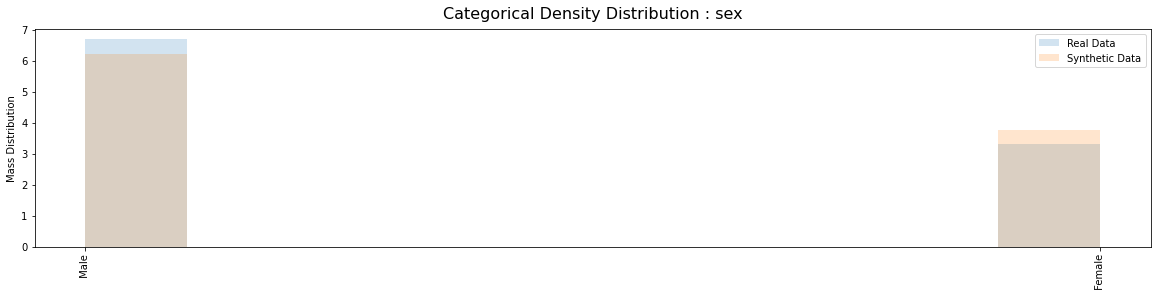

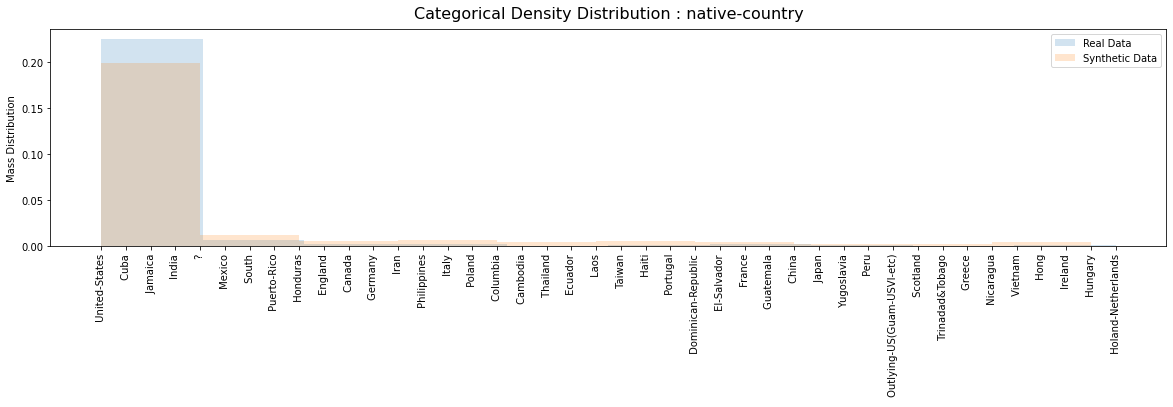

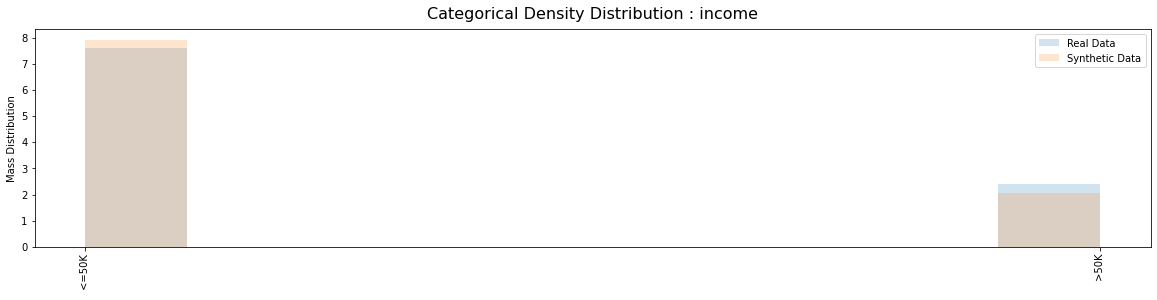

In [27]:
get_full_report(data, sample,discrete_columns,numeric_features,target='income')

#### Report without privacy metrics and without ML efficacy stuff

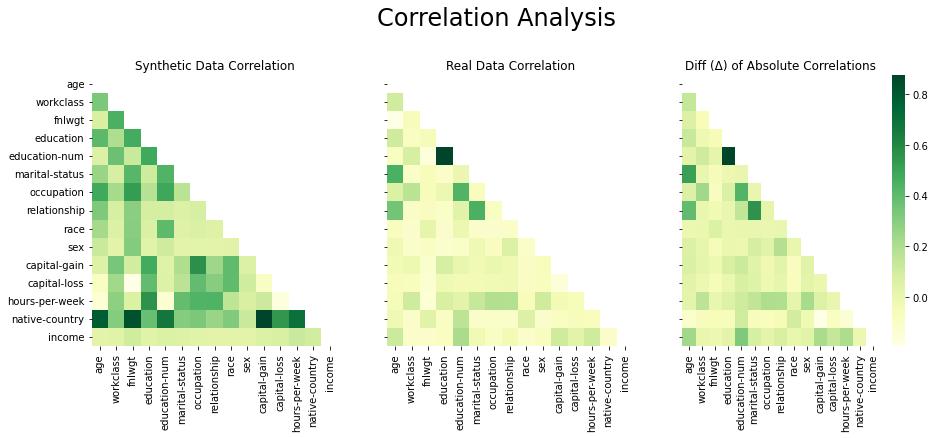

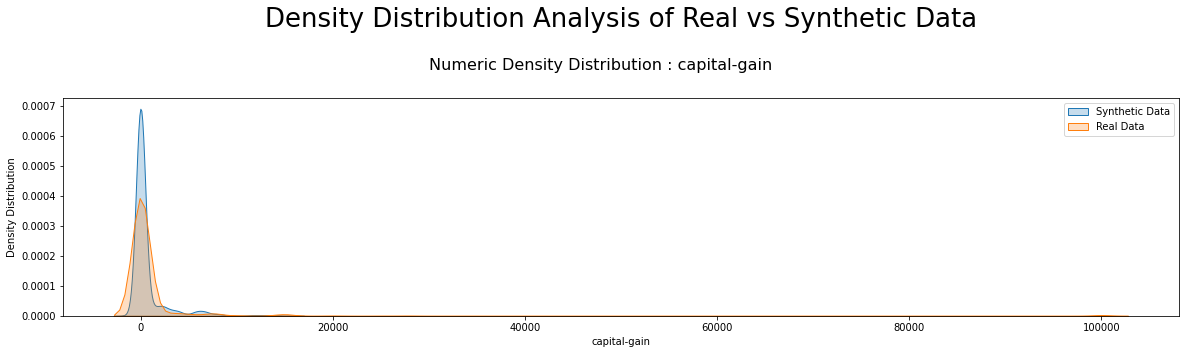

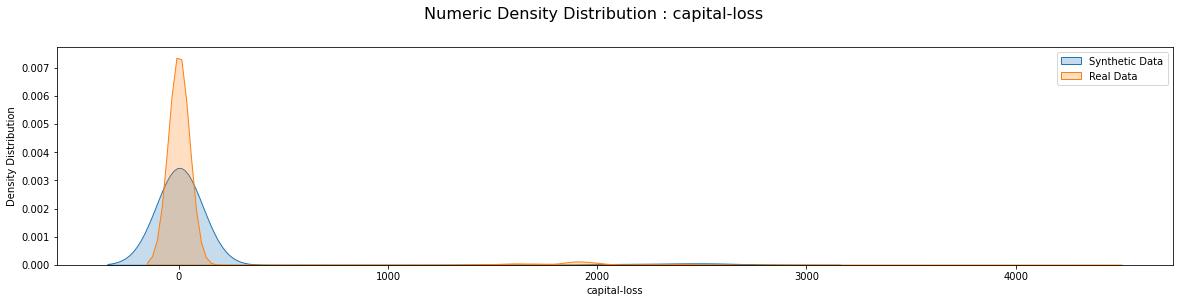

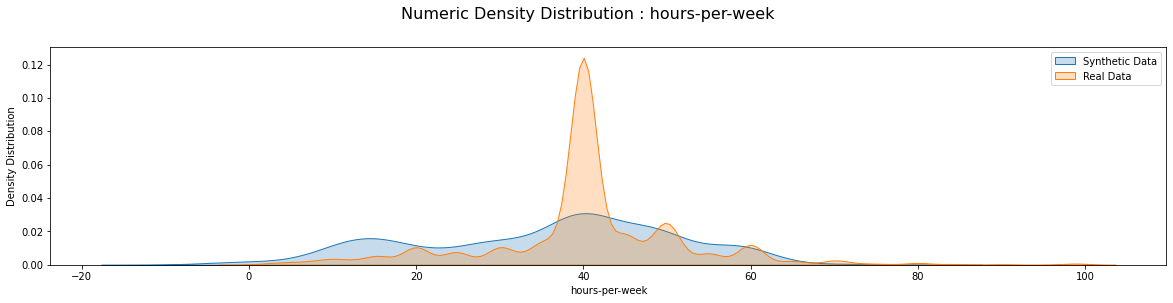

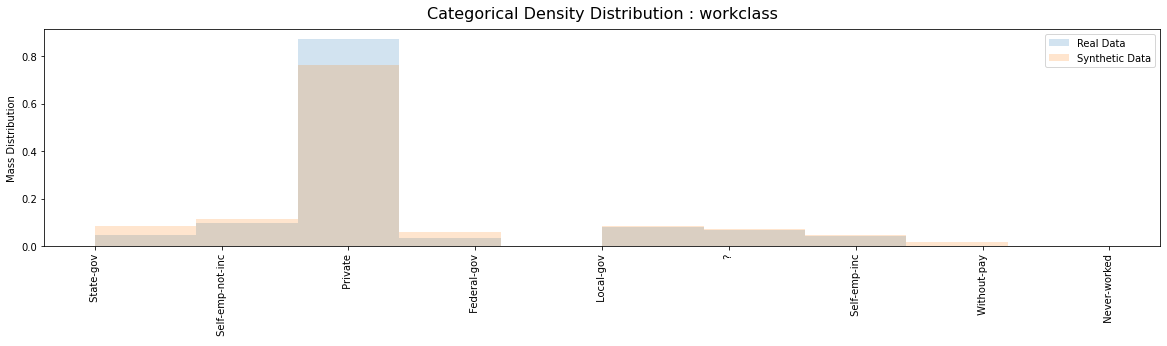

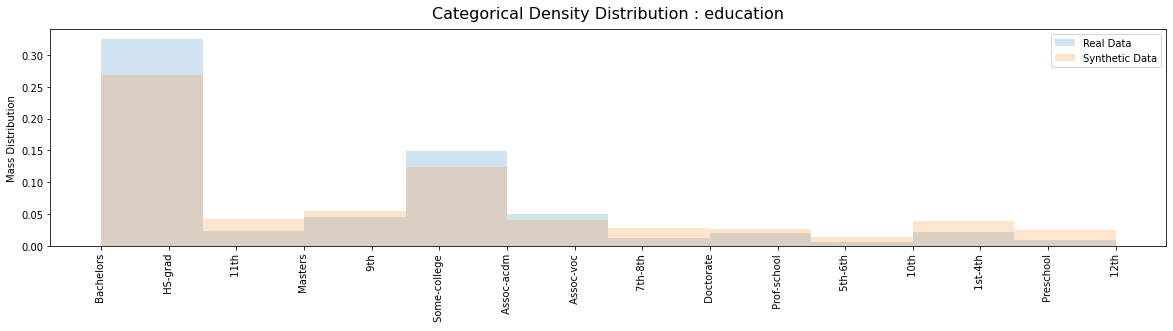

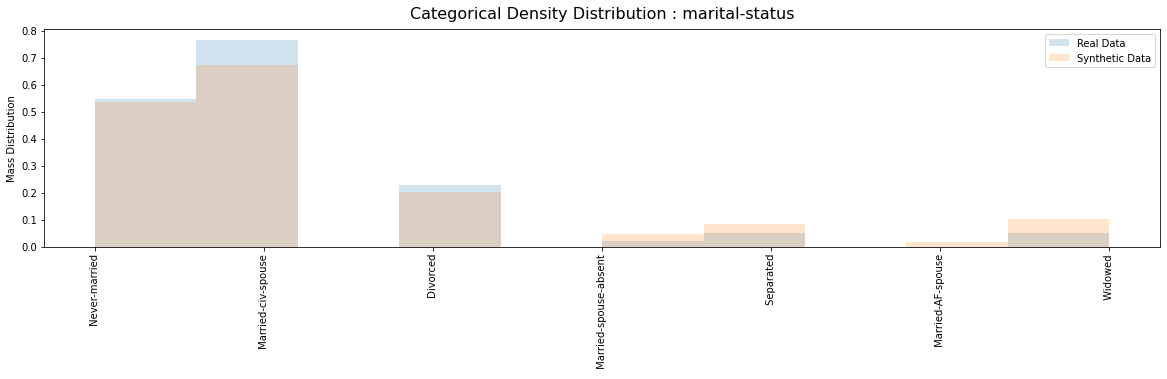

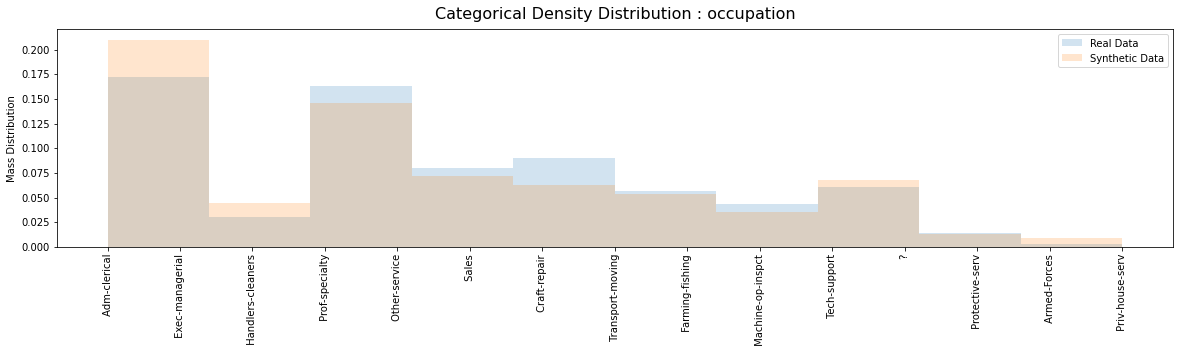

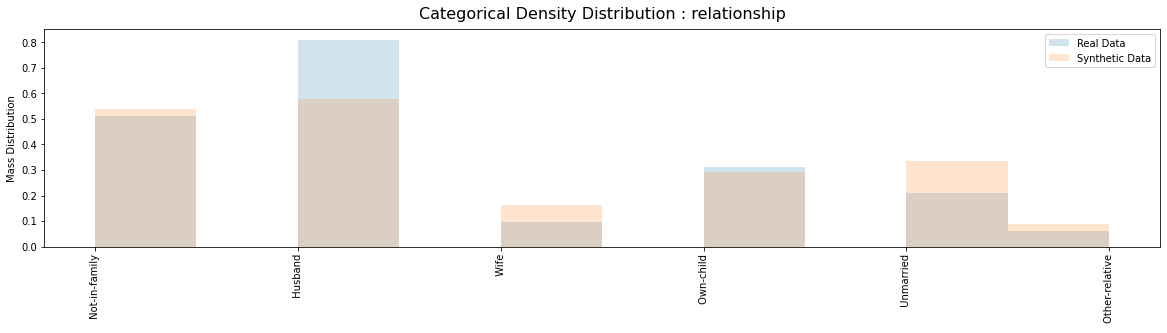

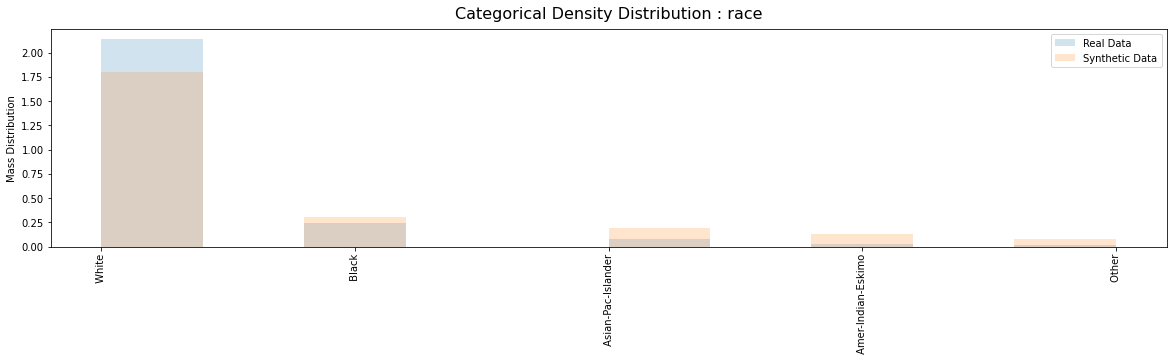

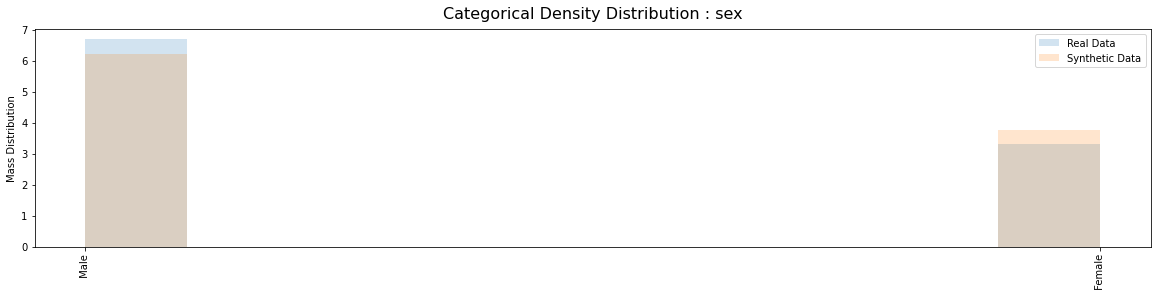

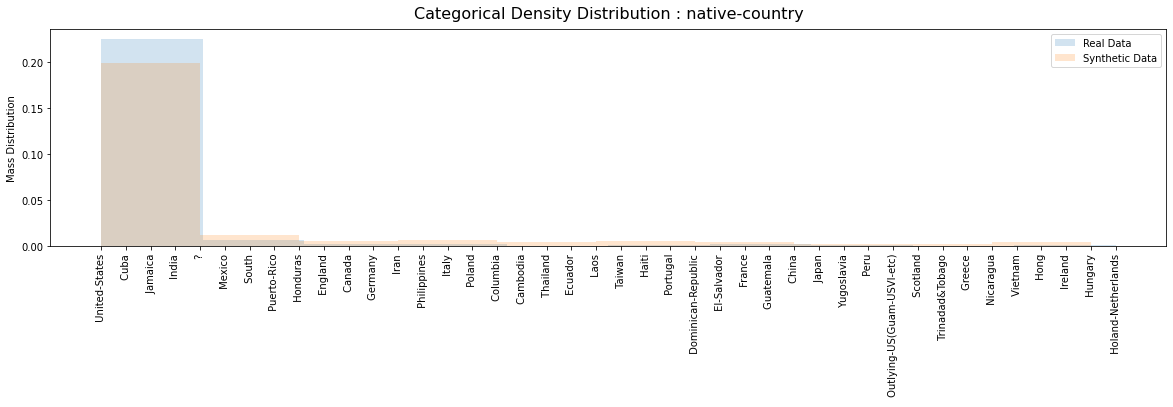

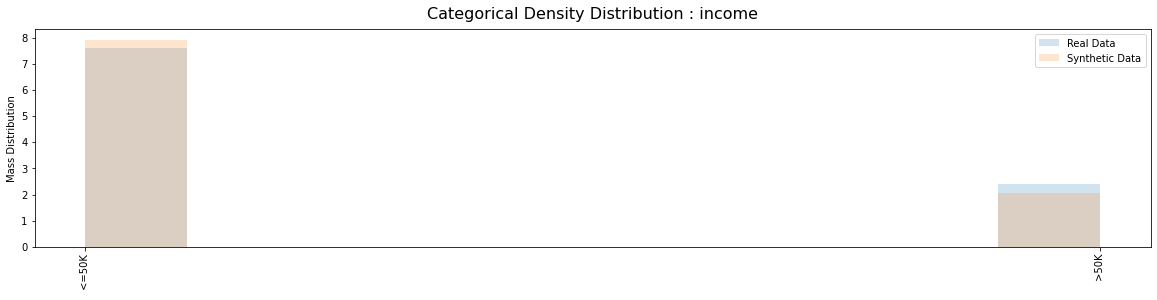

In [28]:
get_full_report(data, sample,discrete_columns,numeric_features)

#### Save model to disk

In [29]:
synth.save('F:/Users/Kaggle/wids/AdversarialAPI.pth')

#### 

## Normal API: Privately differentiable synthesizer

In [30]:
synth = PrivateTwinSynthesizer(epsilon=0.1,batch_size=64,device='cuda')   ### cpu else cuda

In [31]:
synth.fit(data=data,discrete_columns=discrete_columns,update_epsilon=1)

Iteration: [1]  [  0/159]  eta: 0:01:49  loss_t_fake: 0.5867 (0.7007)  loss_t_real: 0.6966 (0.6860)  time: 0.6845  data: 0.0000  max mem: 62
Iteration: [1]  [ 50/159]  eta: 0:01:02  loss_t_fake: 0.0072 (0.0953)  loss_t_real: 0.0461 (0.2769)  time: 0.5632  data: 0.0000  max mem: 62
Iteration: [1]  [100/159]  eta: 0:00:33  loss_t_fake: 0.0014 (0.0498)  loss_t_real: 0.0089 (0.1513)  time: 0.5616  data: 0.0000  max mem: 62
Iteration: [1]  [150/159]  eta: 0:00:05  loss_t_fake: 0.0006 (0.0336)  loss_t_real: 0.0036 (0.1032)  time: 0.6293  data: 0.0000  max mem: 62
Iteration: [1]  [159/159]  eta: 0:00:00  loss_t_fake: 0.0005 (0.0318)  loss_t_real: 0.0027 (0.0976)  time: 0.6273  data: 0.0000  max mem: 62
Iteration: [1] Total time: 0:01:33
Iteration: [1]  [0/4]  eta: 0:00:00  loss_t_fake: 0.0005 (0.0318)  loss_t_real: 0.0027 (0.0976)  loss_s: 0.7224 (0.7292)  time: 0.1495  data: 0.0000  max mem: 63
Iteration: [1]  [1/4]  eta: 0:00:00  loss_t_fake: 0.0005 (0.0318)  loss_t_real: 0.0027 (0.0976)  l

In [32]:
sample = synth.sample(1000)

In [33]:
metrics = SingleTableMetric.get_subclasses()
numeric_features = ['capital-gain','capital-loss','hours-per-week']
discrete_columns = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native-country",
    "income",
]

#### Report with privacy metrics

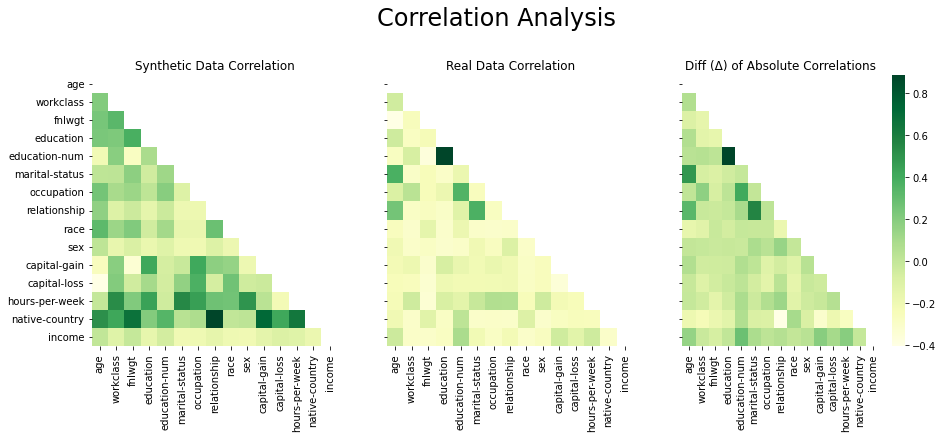

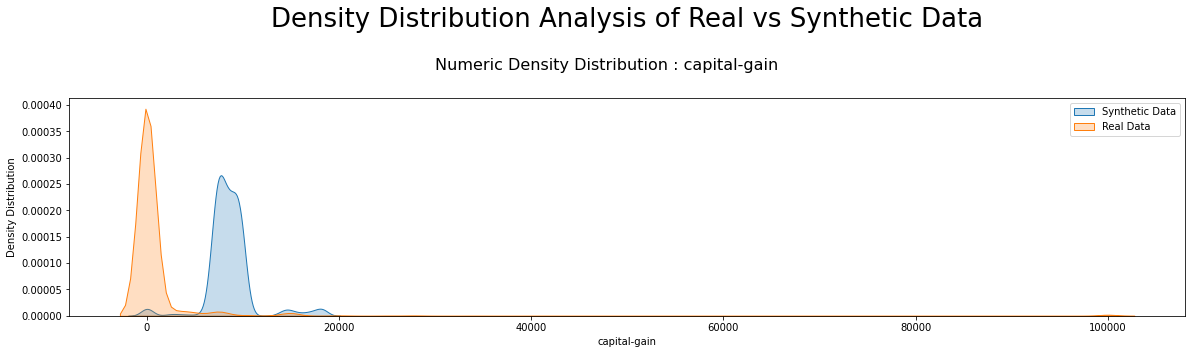

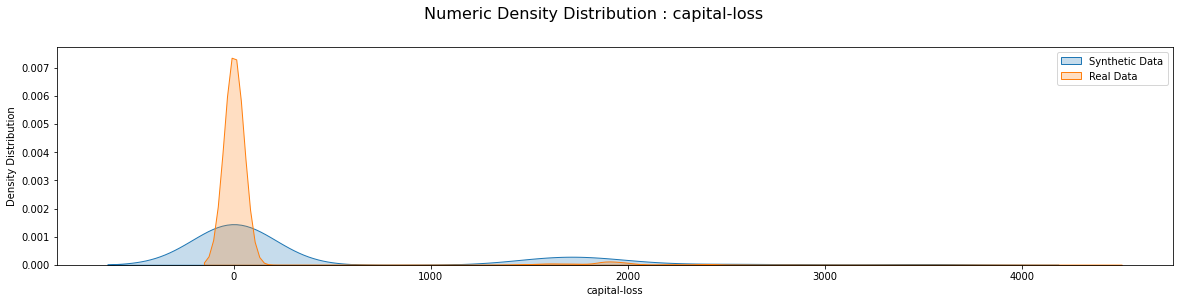

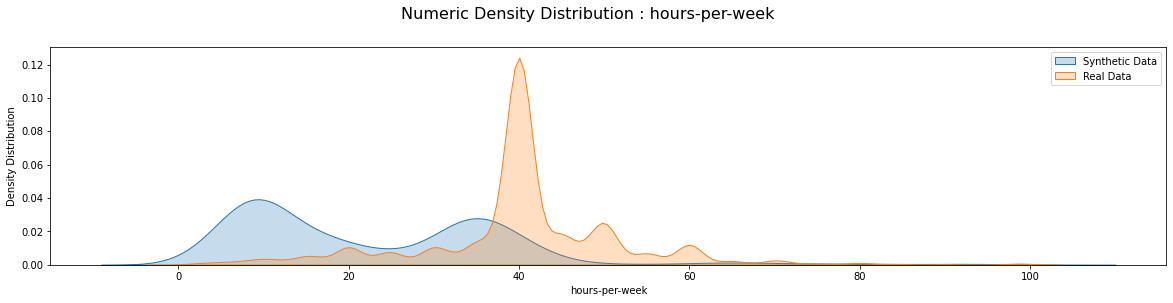

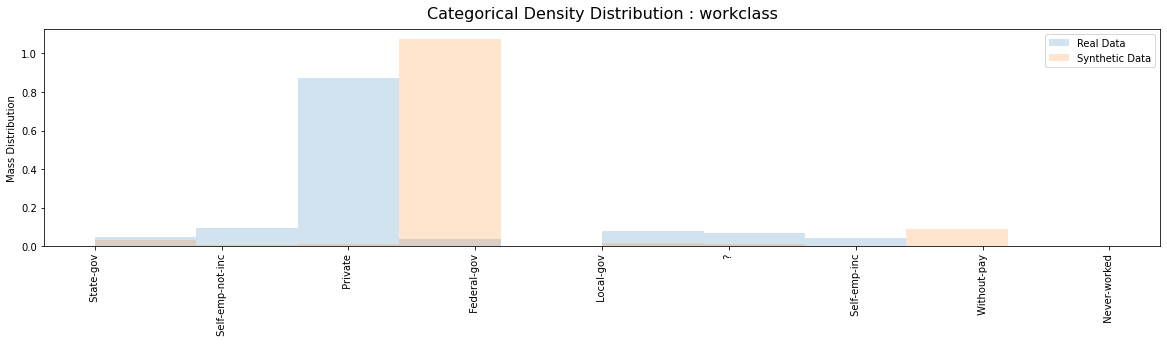

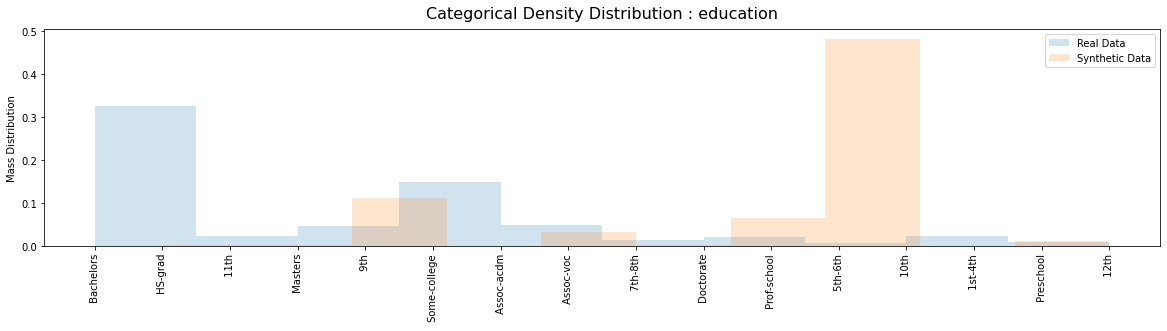

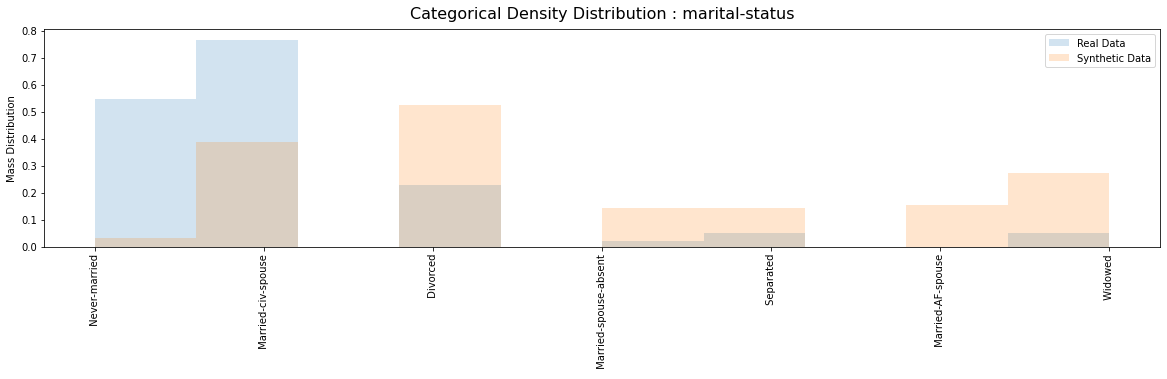

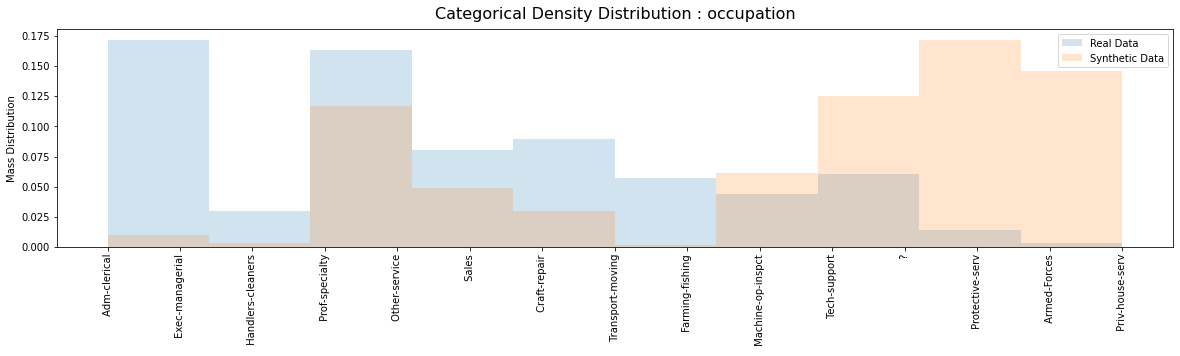

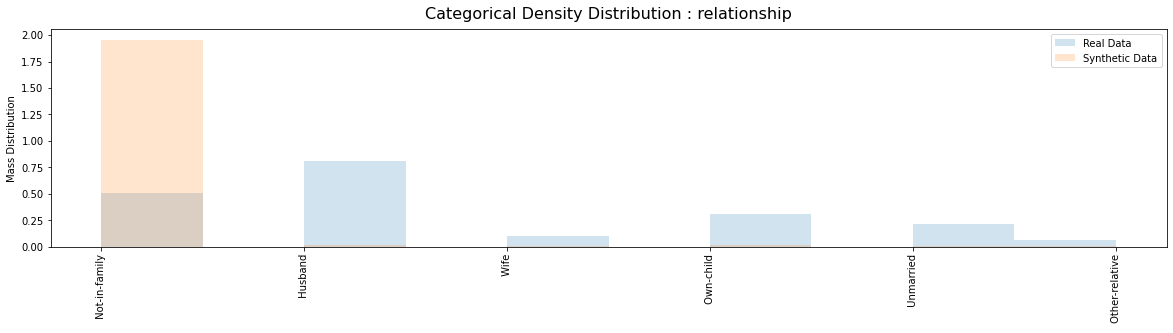

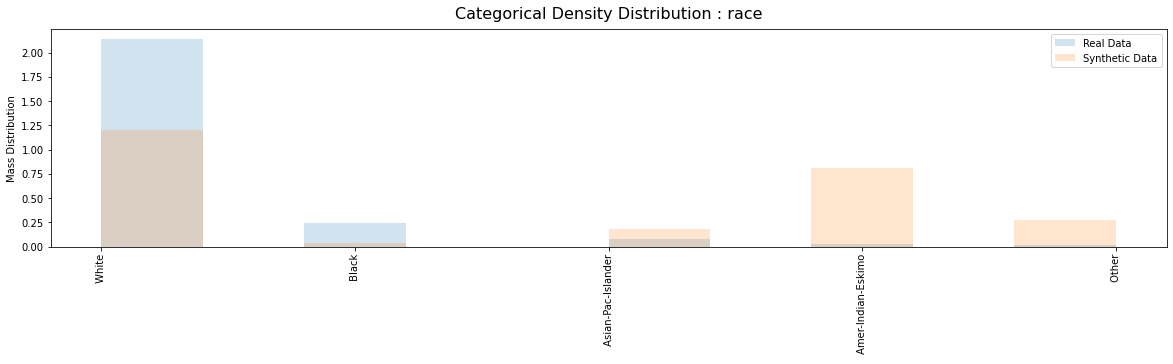

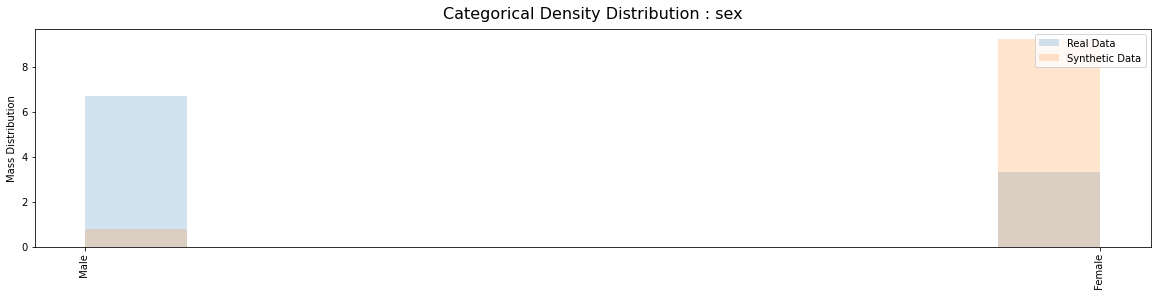

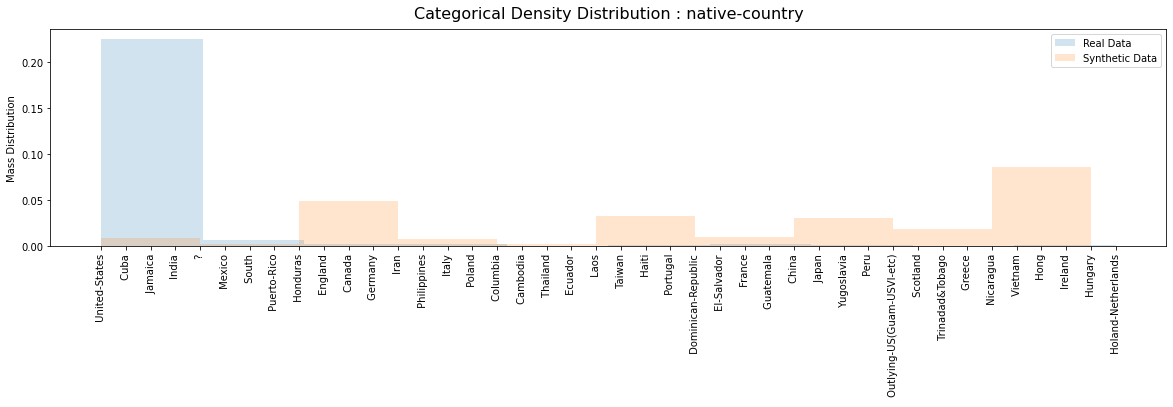

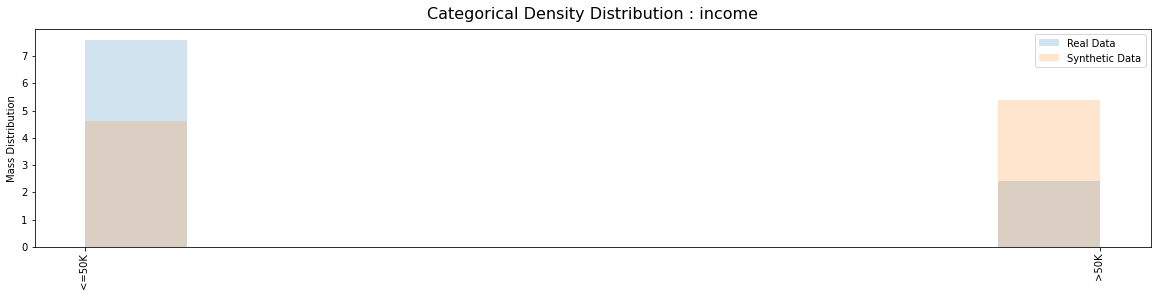

In [34]:
get_full_report(data, sample,discrete_columns,numeric_features, key_fields=['age','workclass','education'],sensitive_fields = ['income'])

#### Report without privacy metrics, but includes ML efficacy stuff

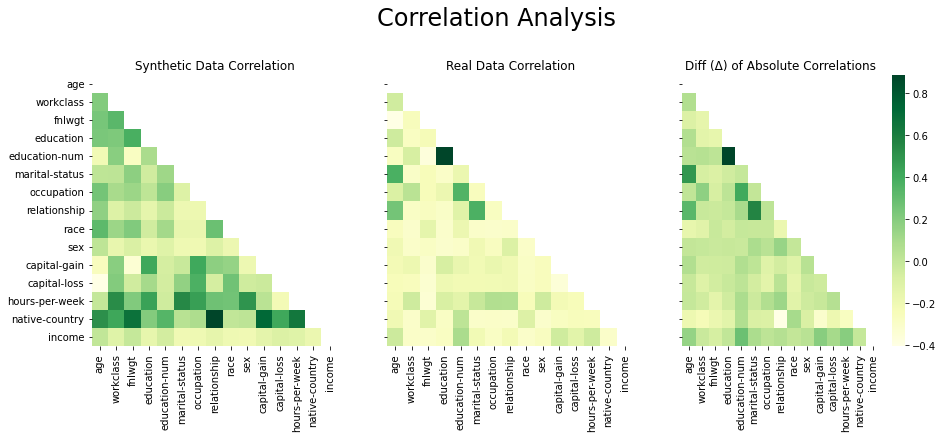

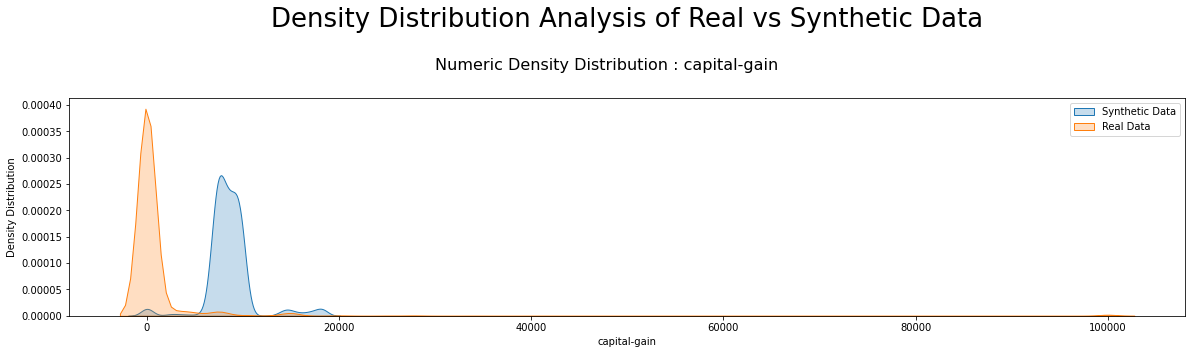

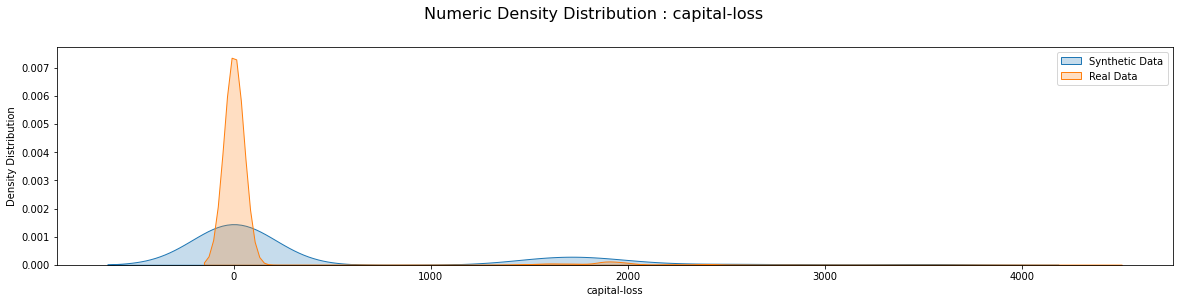

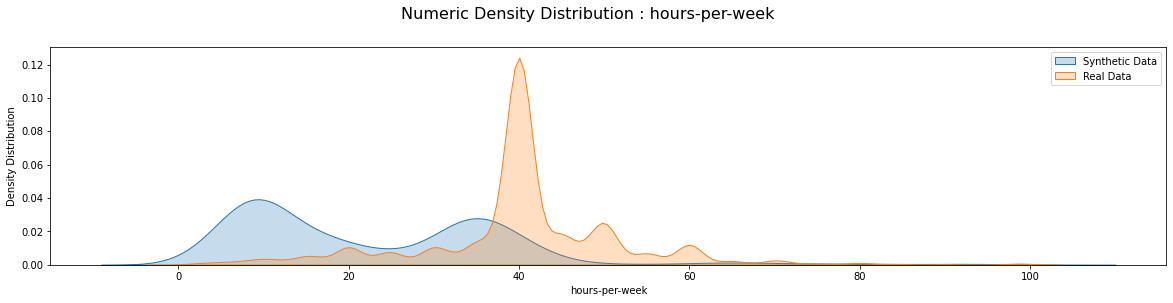

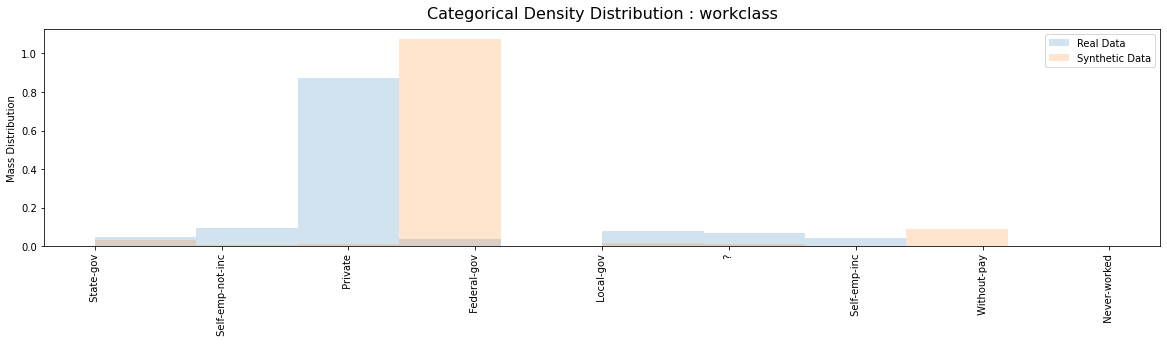

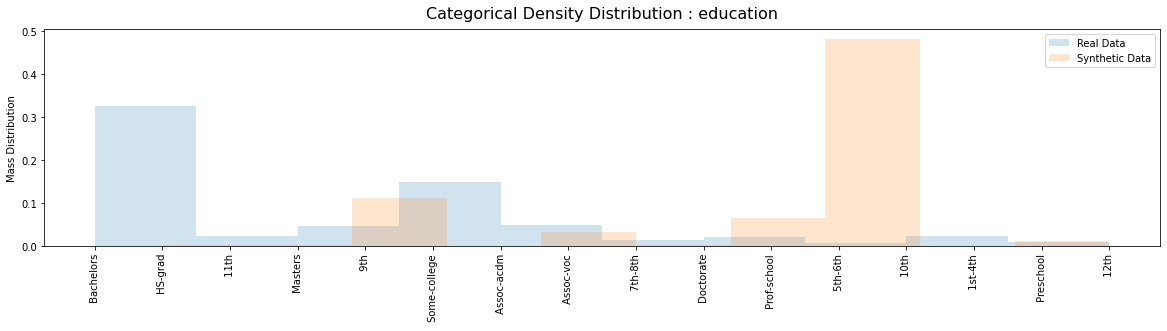

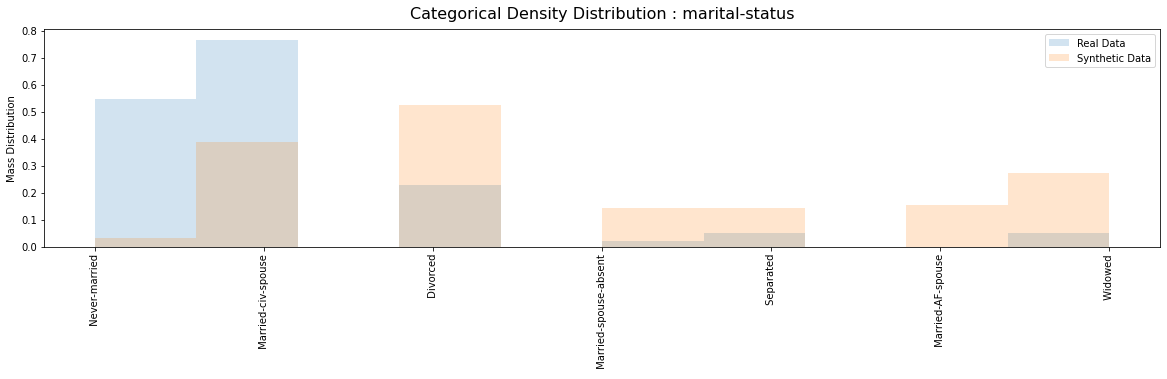

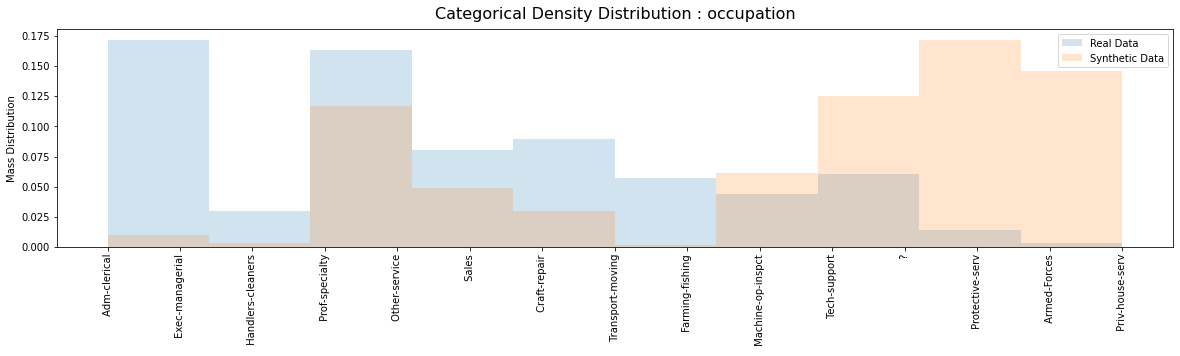

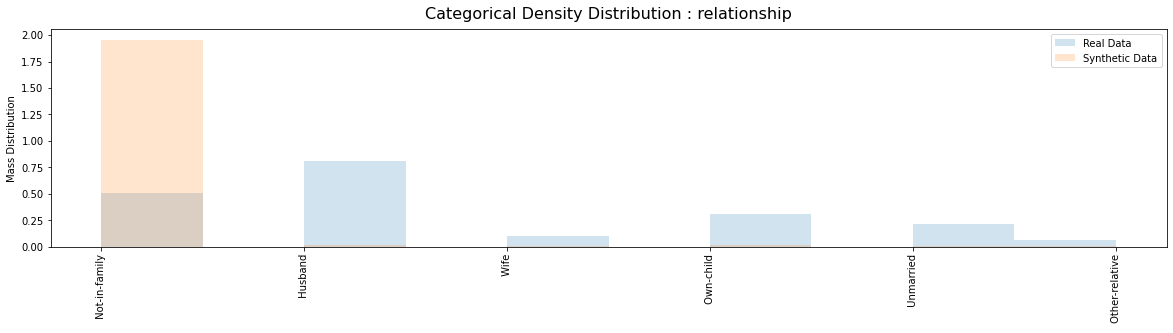

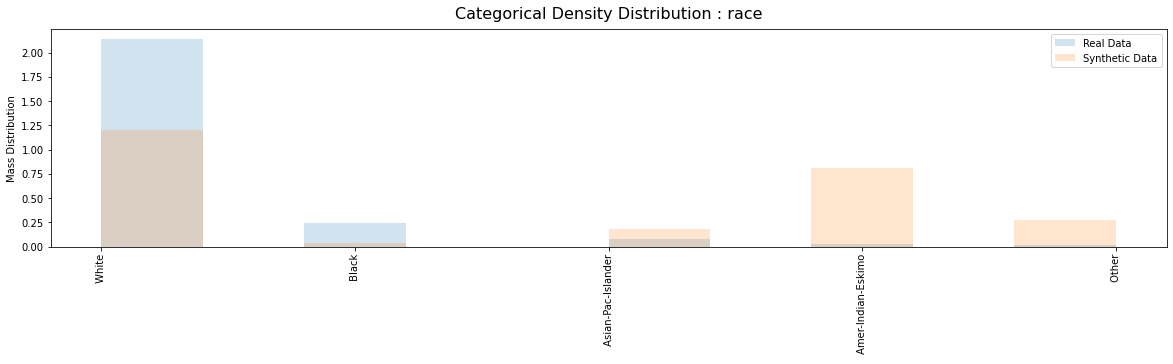

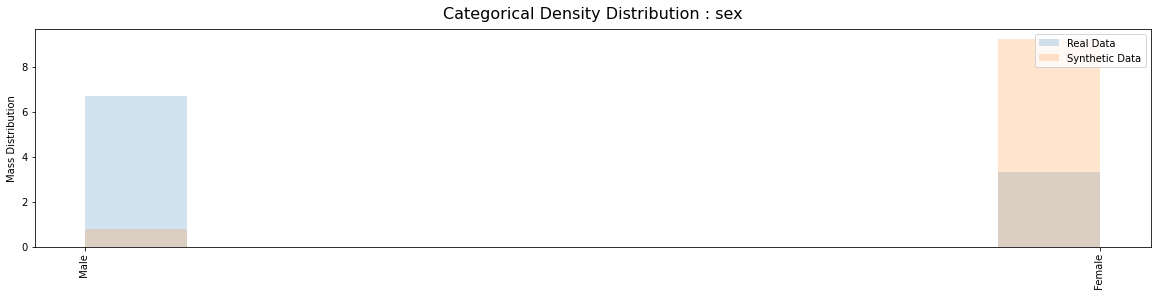

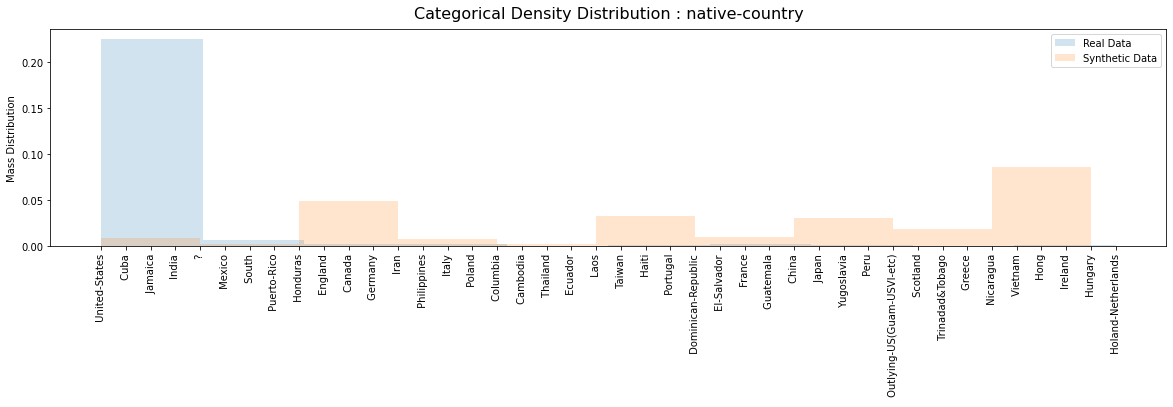

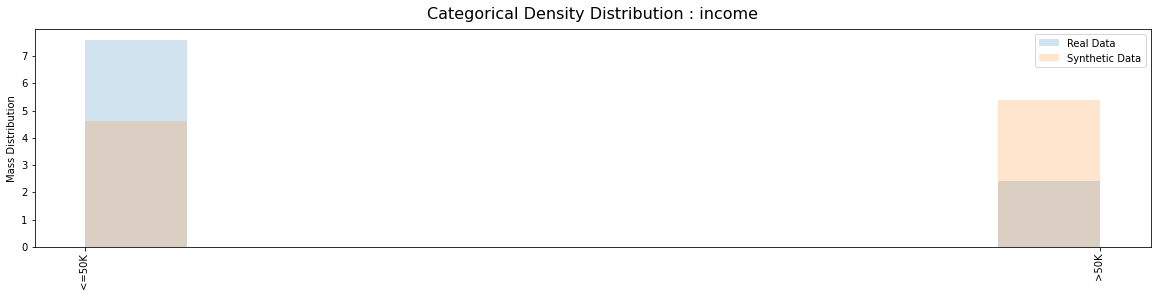

In [35]:
get_full_report(data, sample,discrete_columns,numeric_features,target='income')

#### Report without privacy metrics and without ML efficacy stuff

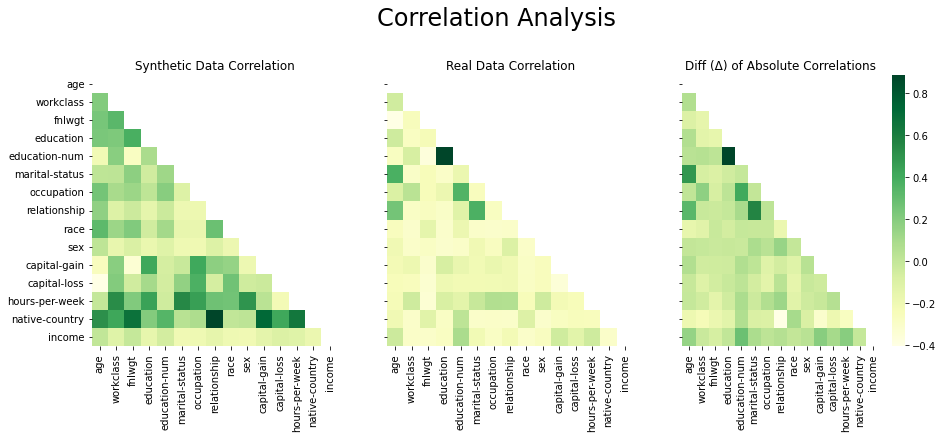

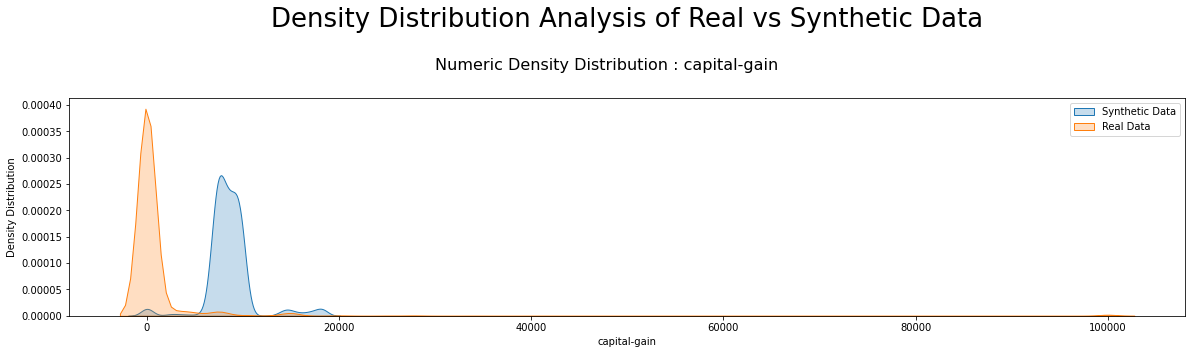

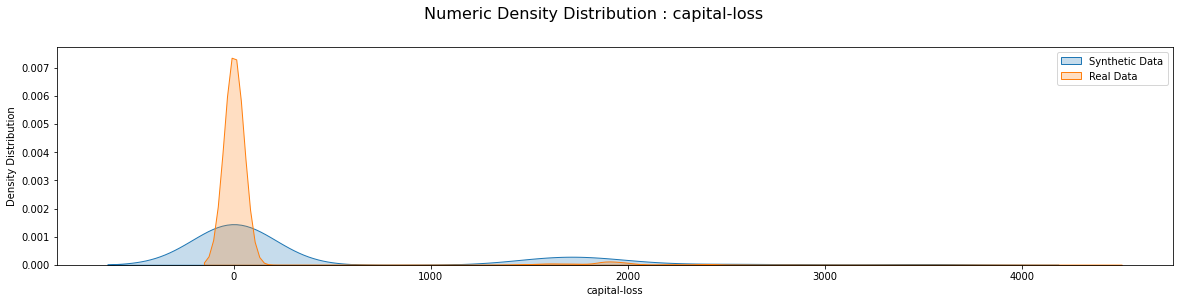

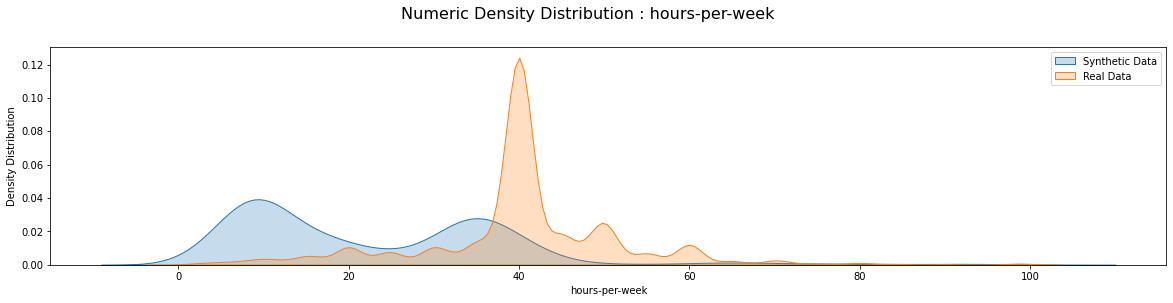

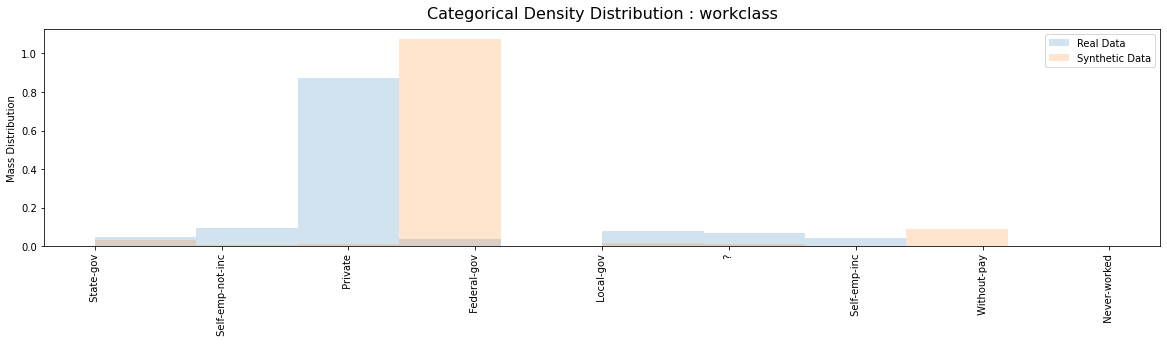

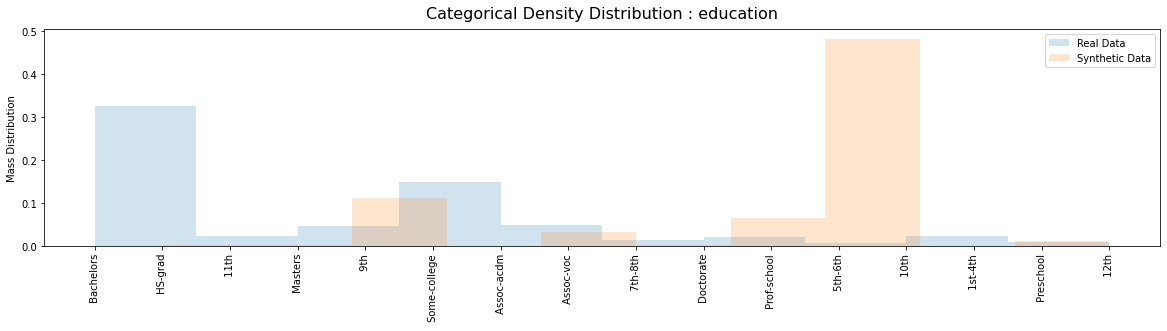

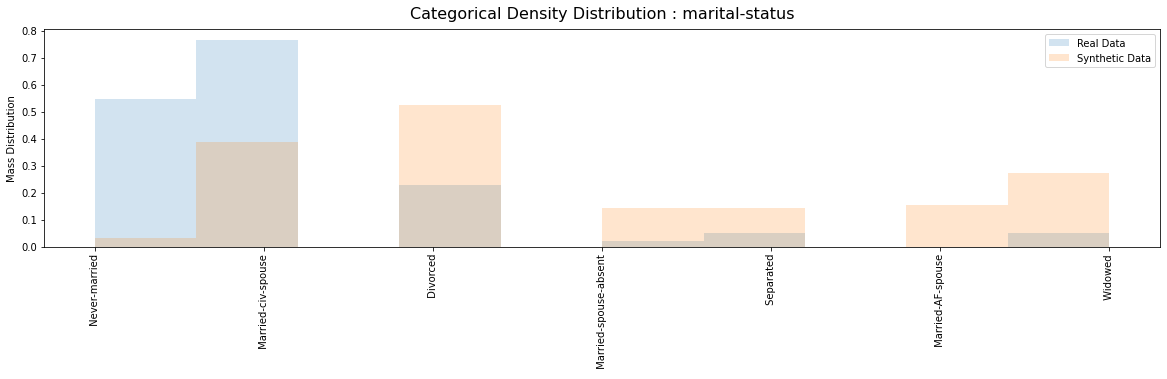

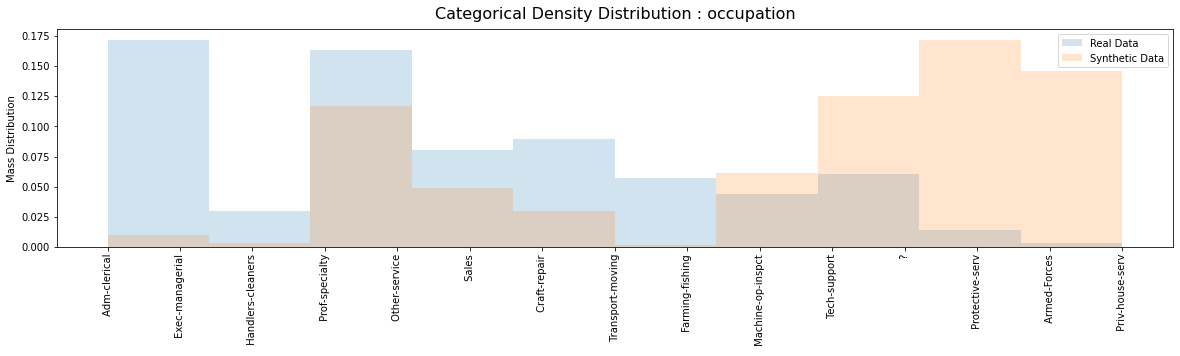

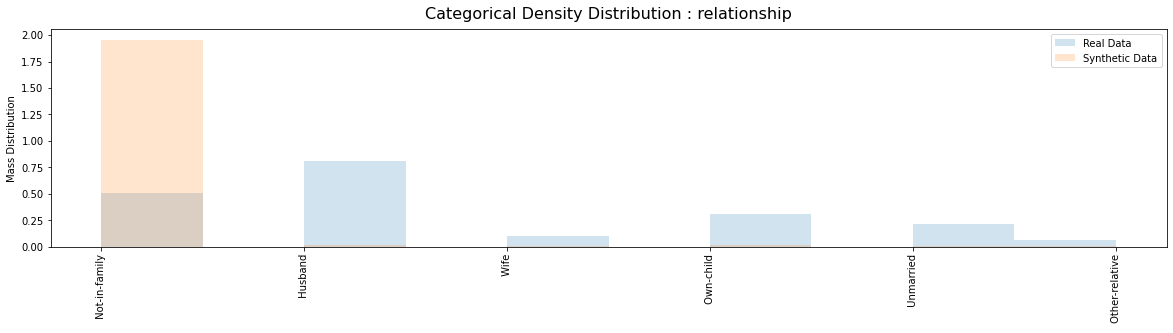

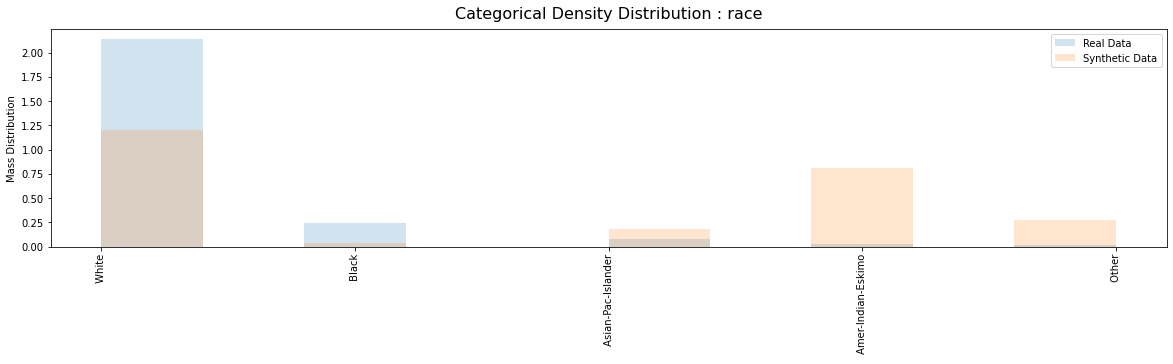

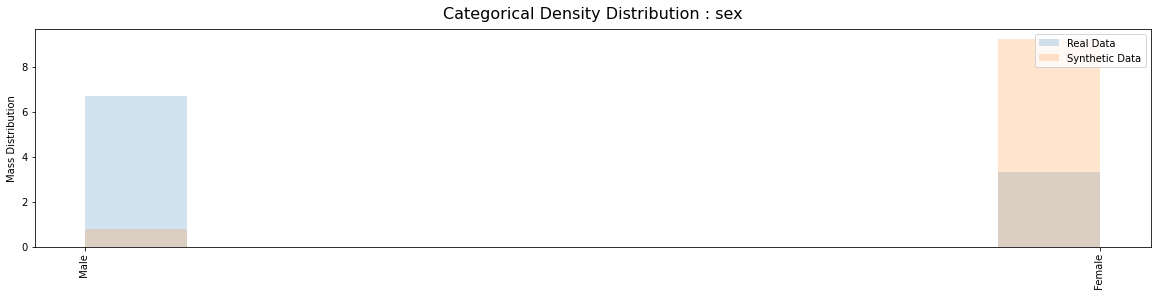

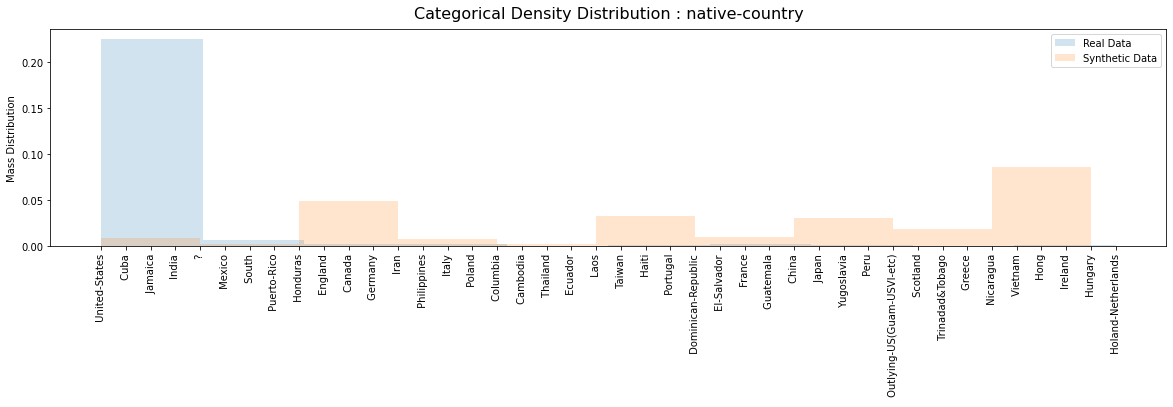

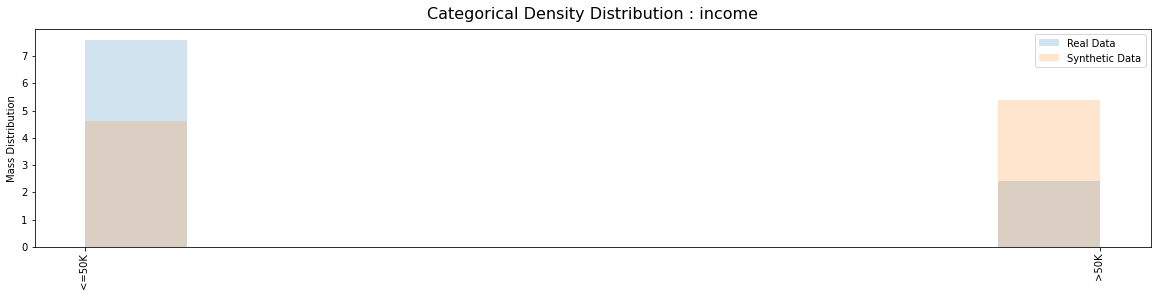

In [36]:
get_full_report(data, sample,discrete_columns,numeric_features)

#### Save model to disk

In [37]:
synth.save('F:/Users/Kaggle/wids/PrivateModelNormalAPI.pth')

#### 

## Adversarial API: Privately differentiable synthesizer

In [38]:
synth = PrivateTwinSynthesizer(epsilon=0.1,batch_size=64,device='cuda')   ### cpu else cuda

In [39]:
synth.fit_adversarial(data=data,discrete_columns=discrete_columns,update_epsilon=1)

Generating train and test splits ...
TRAIN SAMPLES: n=26048
TEST SAMPLES: n=6513
Iteration: [1]  [  0/129]  eta: 0:01:12  loss_t_fake: 0.6250 (0.7209)  loss_t_real: 0.6469 (0.6830)  time: 0.5551  data: 0.0000  max mem: 64
Iteration: [1]  [ 50/129]  eta: 0:00:39  loss_t_fake: 0.0080 (0.0982)  loss_t_real: 0.0481 (0.2854)  time: 0.4868  data: 0.0000  max mem: 64
Iteration: [1]  [100/129]  eta: 0:00:14  loss_t_fake: 0.0016 (0.0515)  loss_t_real: 0.0090 (0.1560)  time: 0.4576  data: 0.0000  max mem: 64
Iteration: [1]  [129/129]  eta: 0:00:00  loss_t_fake: 0.0009 (0.0403)  loss_t_real: 0.0051 (0.1229)  time: 0.4586  data: 0.0000  max mem: 64
Iteration: [1] Total time: 0:01:01
Iteration: [1]  [0/4]  eta: 0:00:00  loss_t_fake: 0.0009 (0.0403)  loss_t_real: 0.0051 (0.1229)  loss_s: 0.7101 (0.7076)  time: 0.1043  data: 0.0000  max mem: 64
Iteration: [1]  [1/4]  eta: 0:00:00  loss_t_fake: 0.0009 (0.0403)  loss_t_real: 0.0051 (0.1229)  loss_s: 0.6995 (0.7006)  time: 0.1048  data: 0.0000  max mem:

In [40]:
sample = synth.sample_adversarial(data,1000)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [41]:
metrics = SingleTableMetric.get_subclasses()
numeric_features = ['capital-gain','capital-loss','hours-per-week']
discrete_columns = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native-country",
    "income",
]

#### Report with privacy metrics

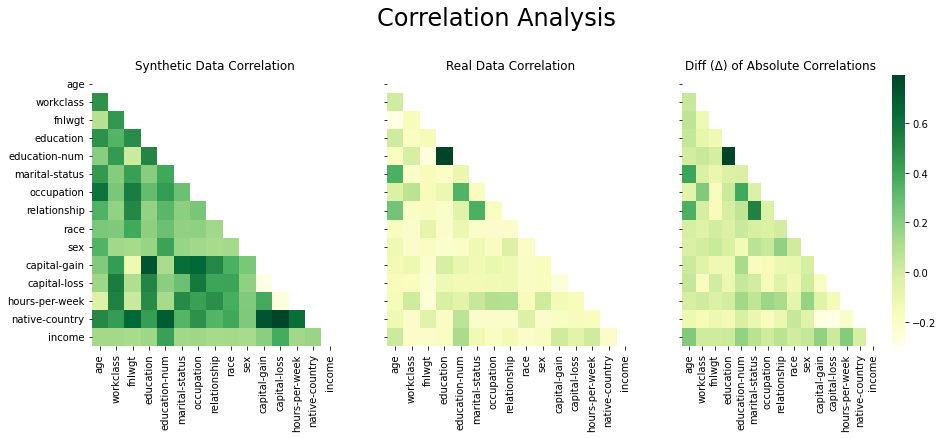

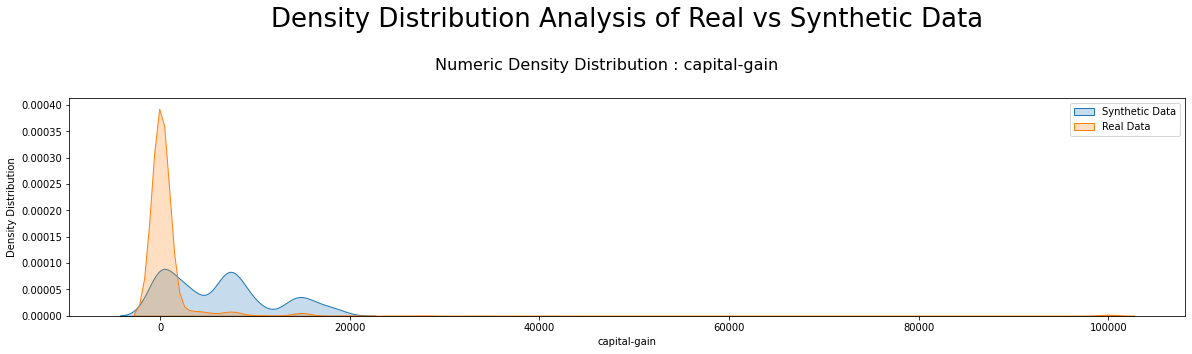

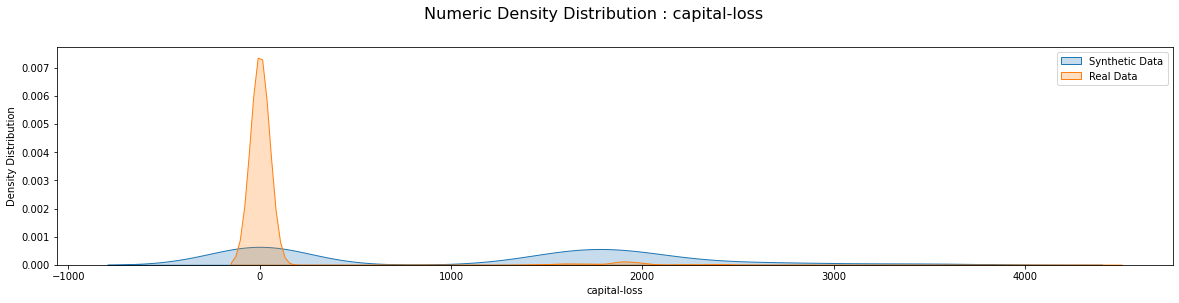

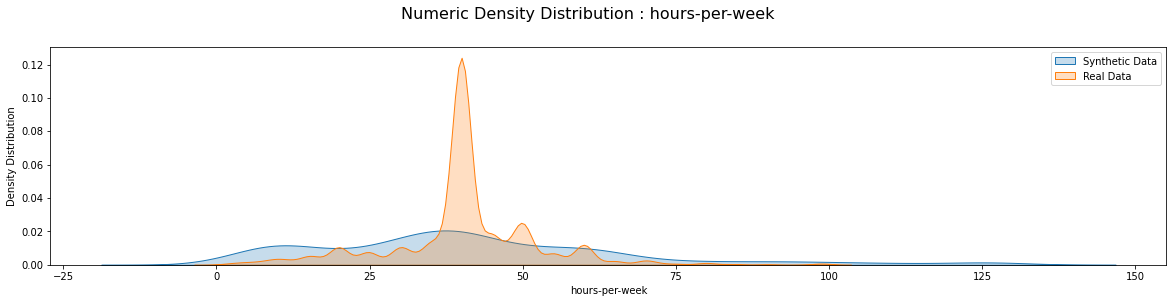

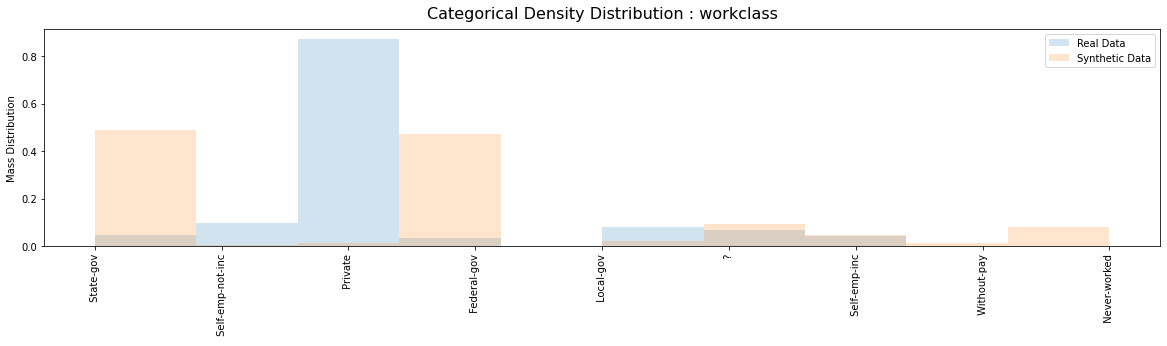

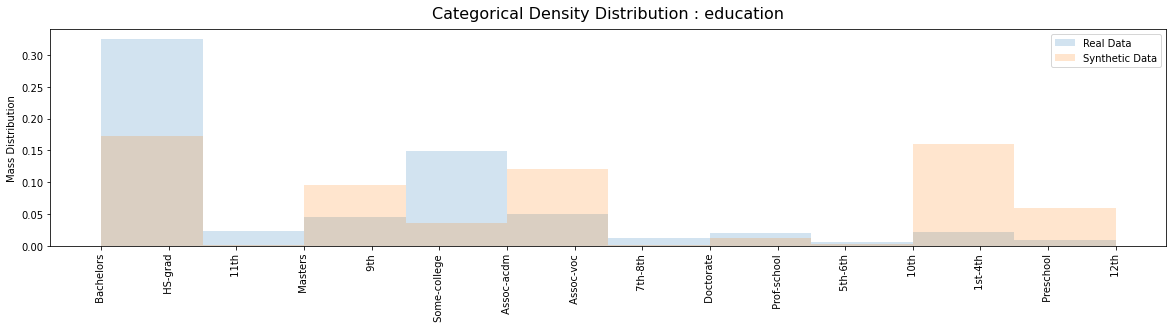

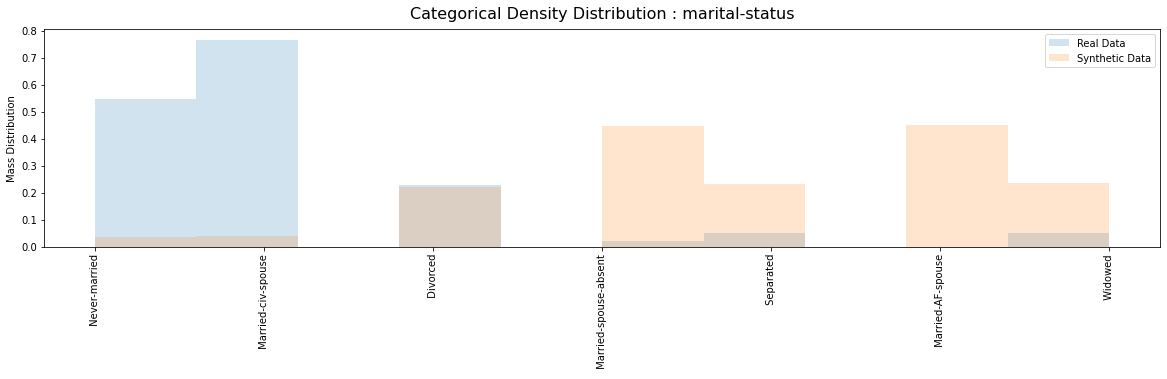

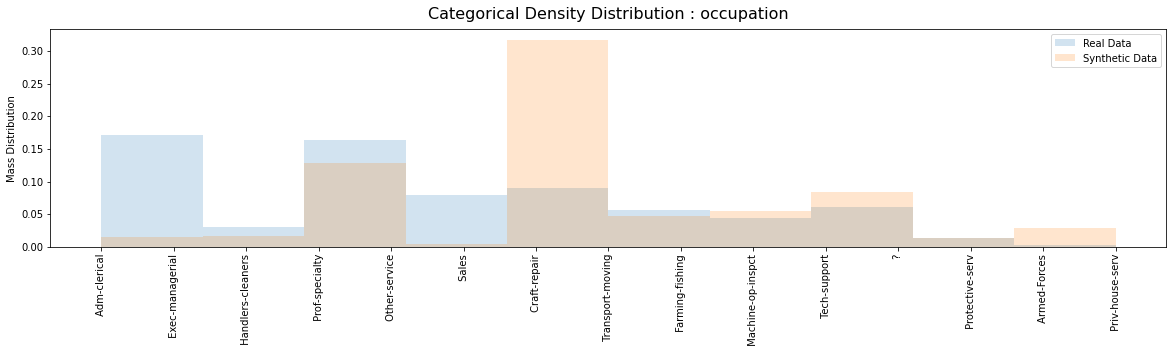

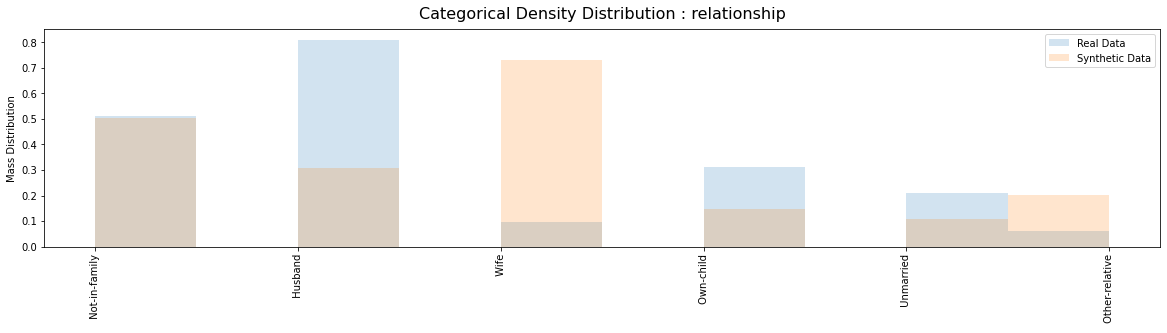

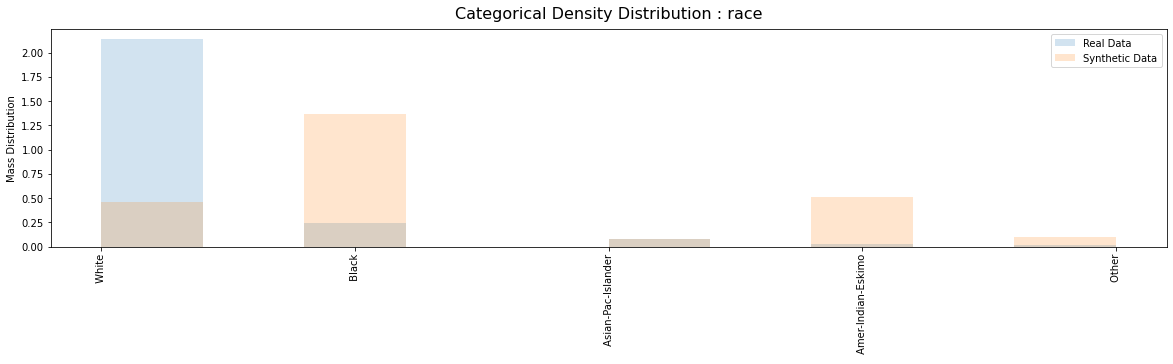

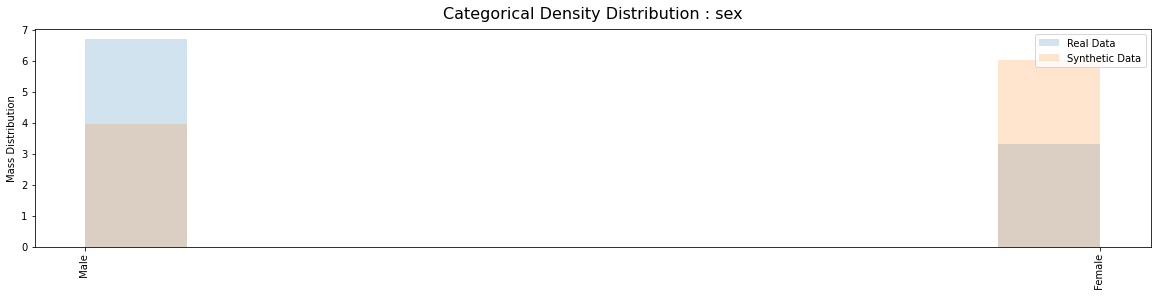

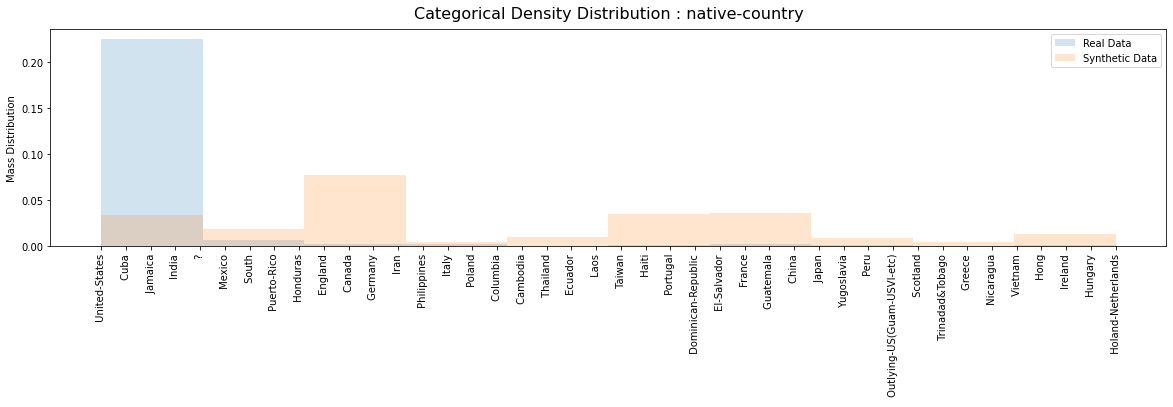

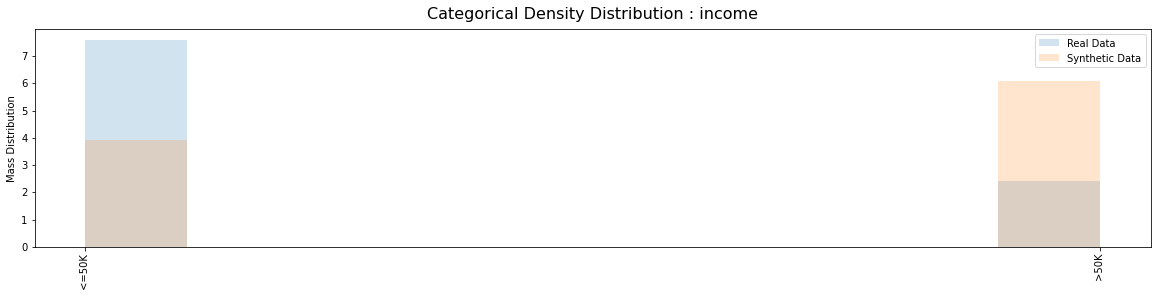

In [42]:
get_full_report(data, sample,discrete_columns,numeric_features, key_fields=['age','workclass','education'],sensitive_fields = ['income'])

#### Report without privacy metrics, but includes ML efficacy stuff

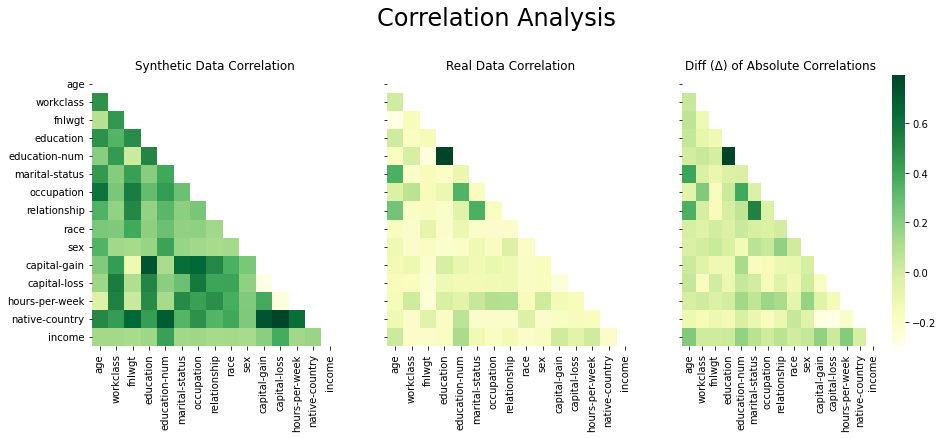

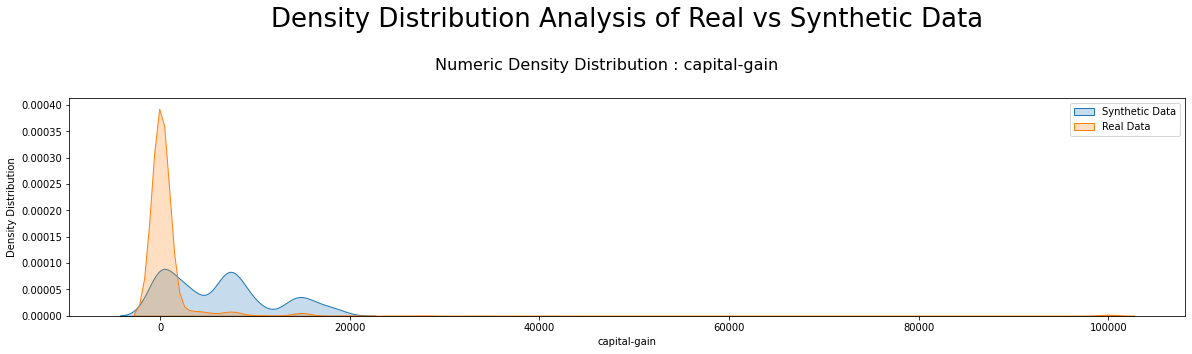

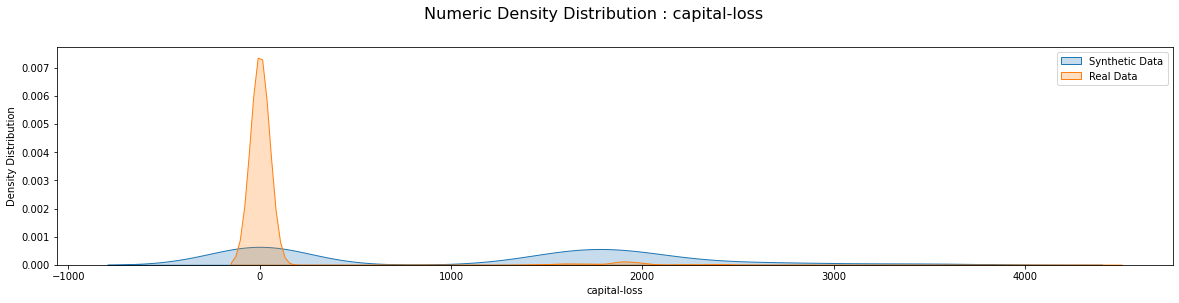

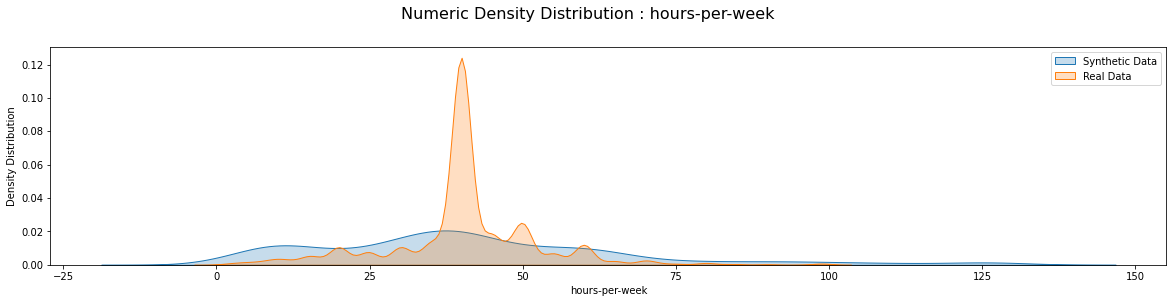

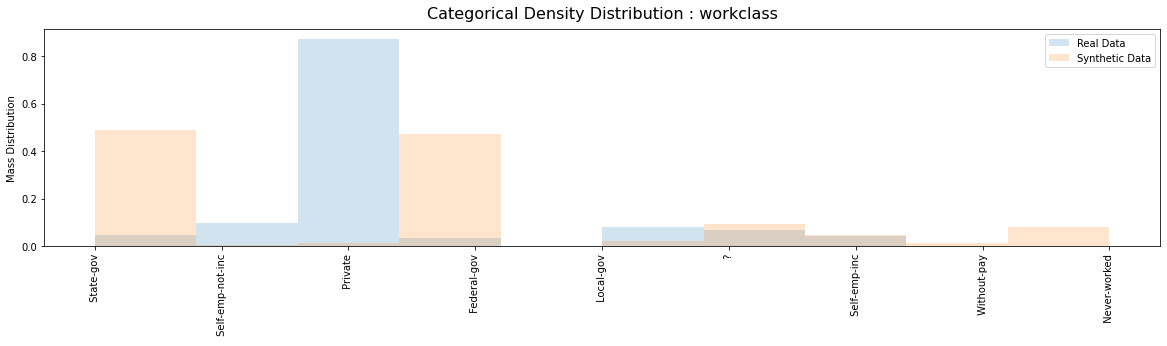

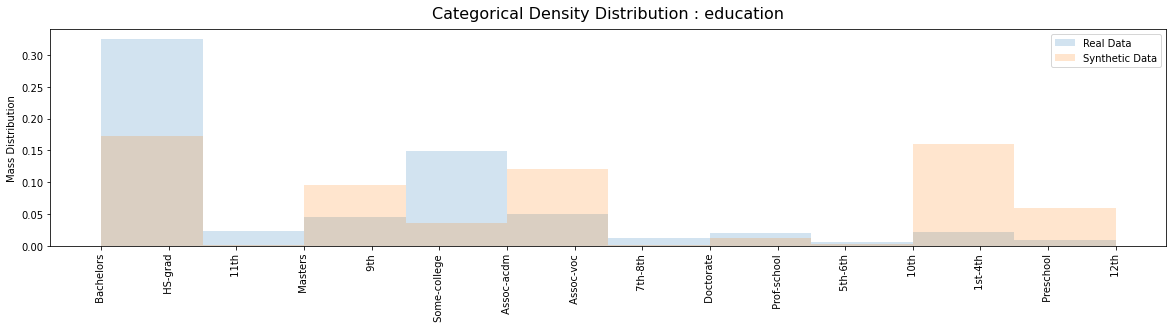

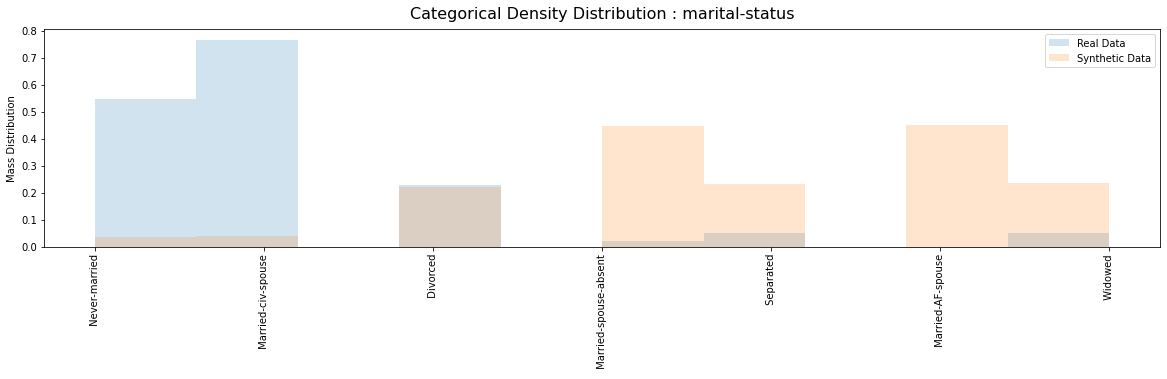

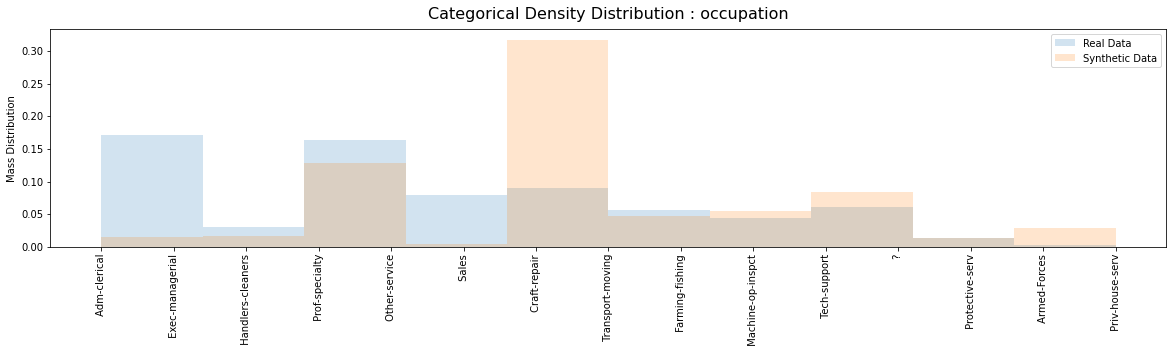

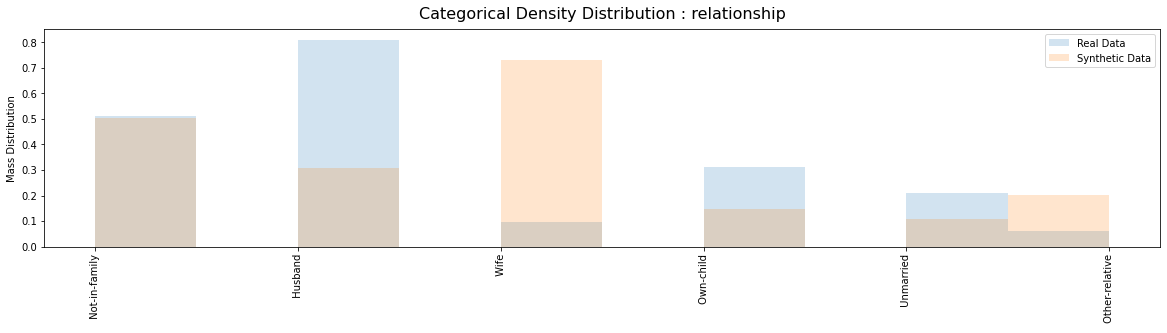

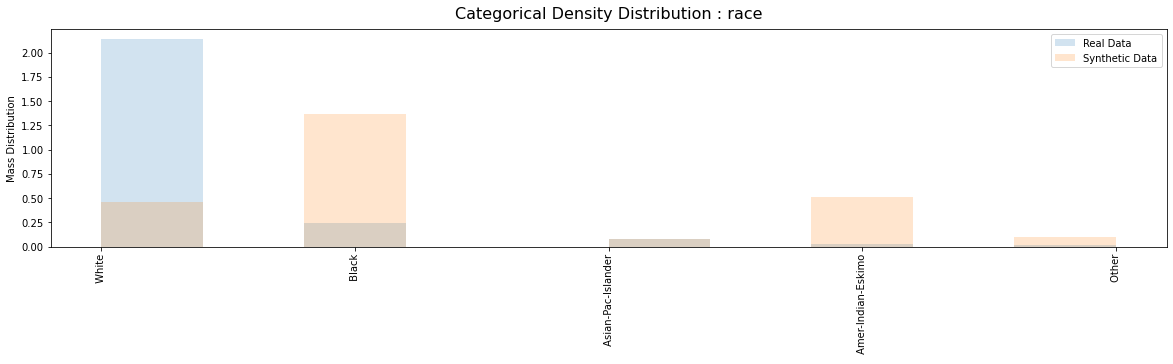

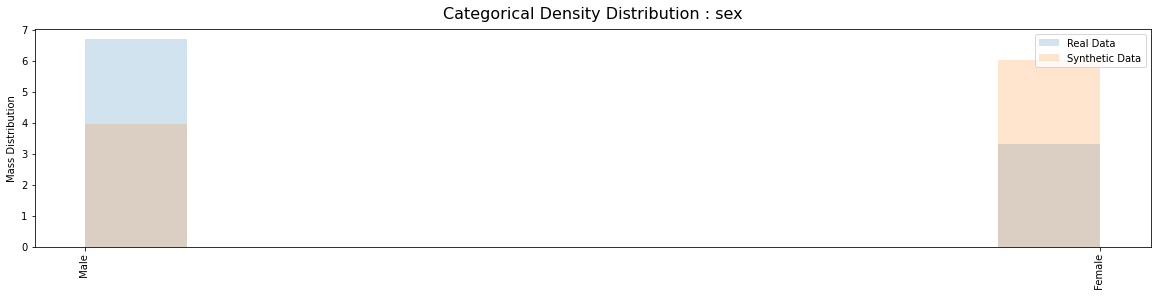

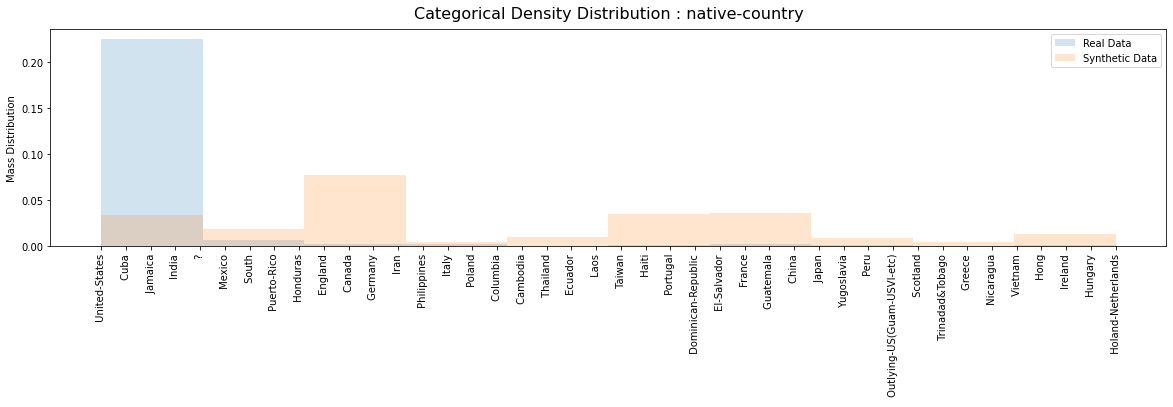

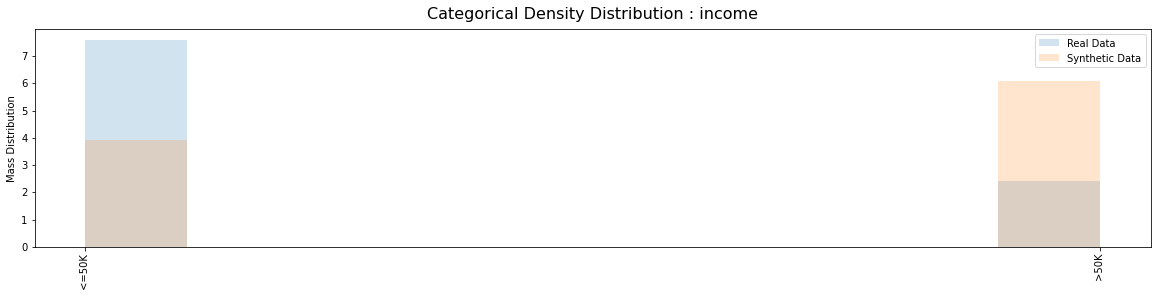

In [43]:
get_full_report(data, sample,discrete_columns,numeric_features,target='income')

#### Report without privacy metrics and without ML efficacy stuff

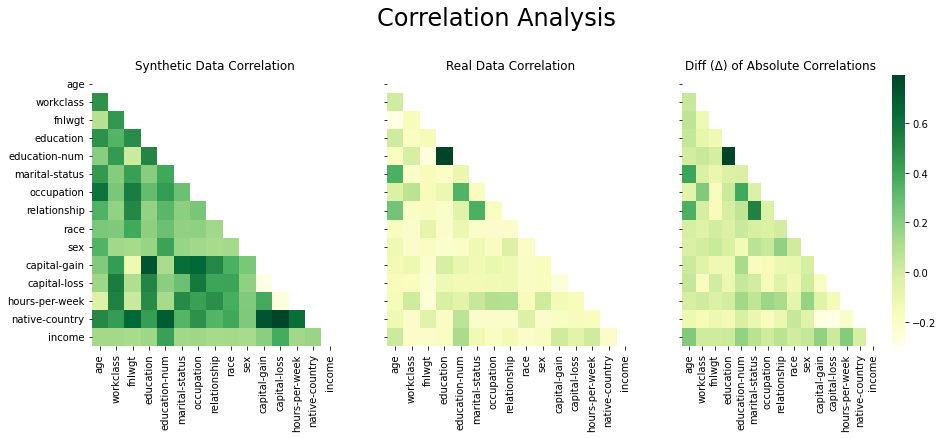

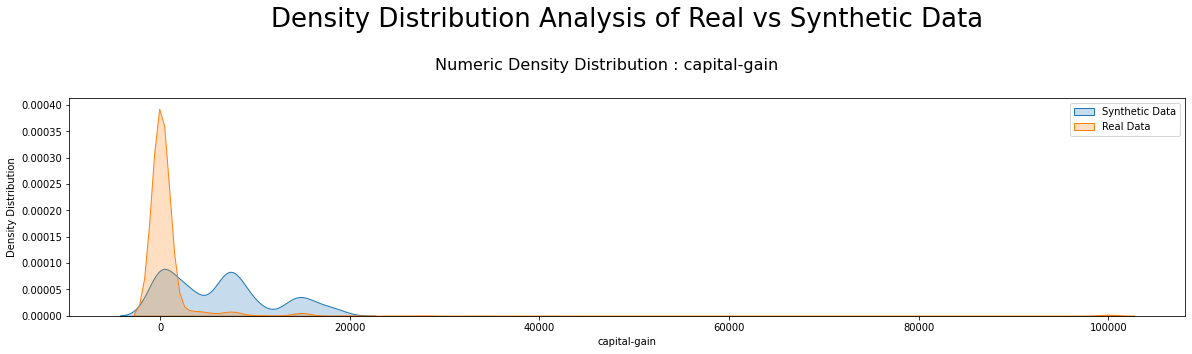

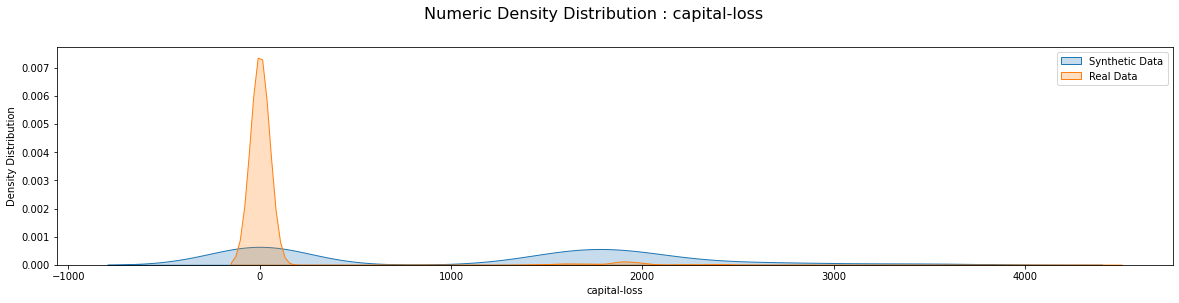

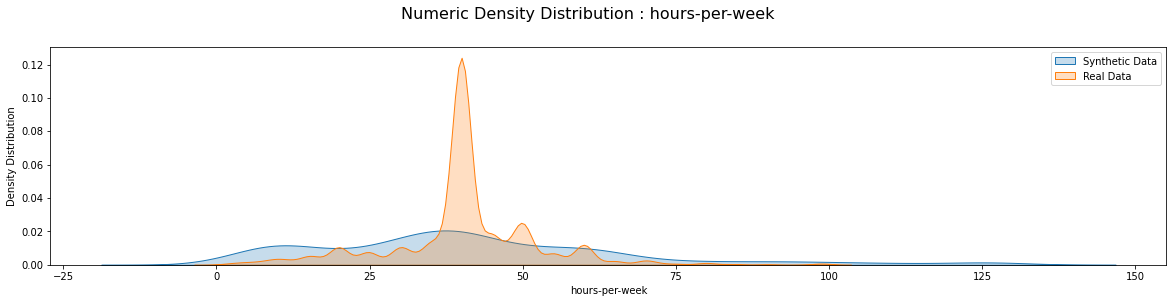

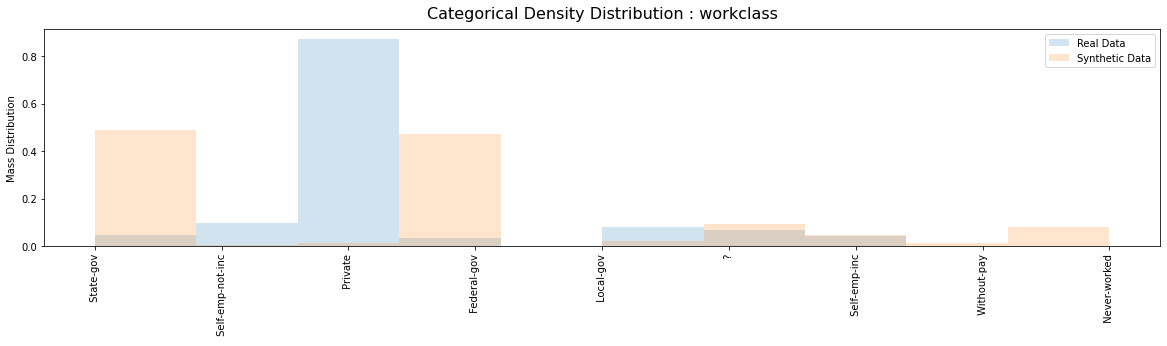

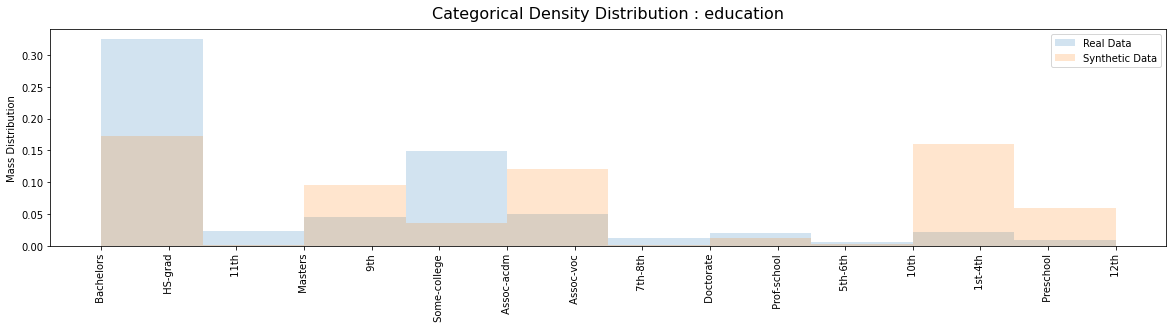

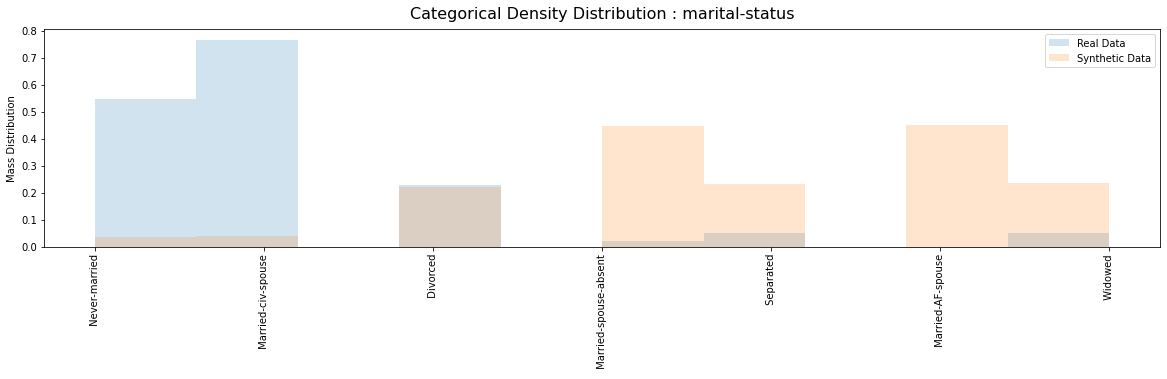

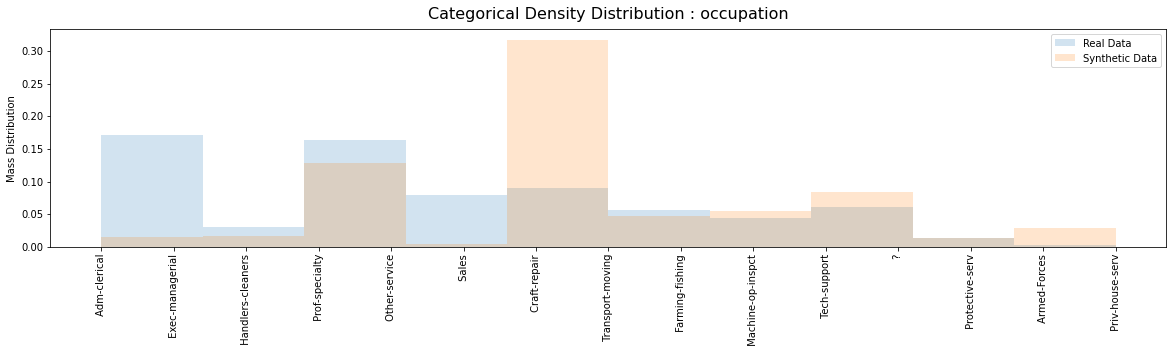

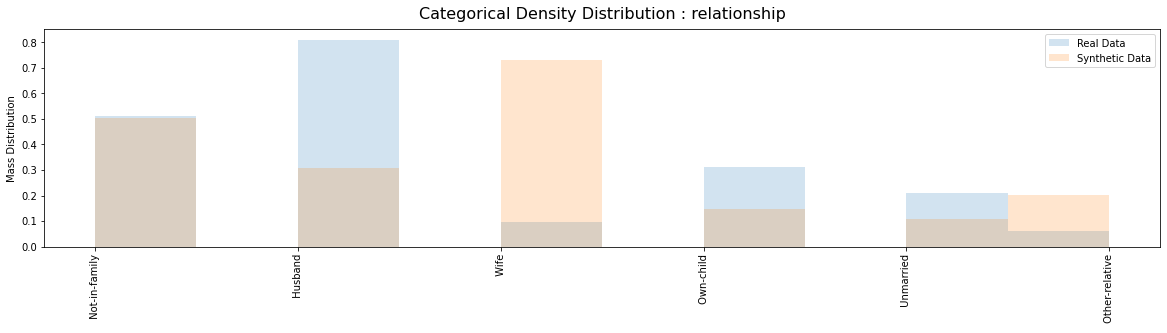

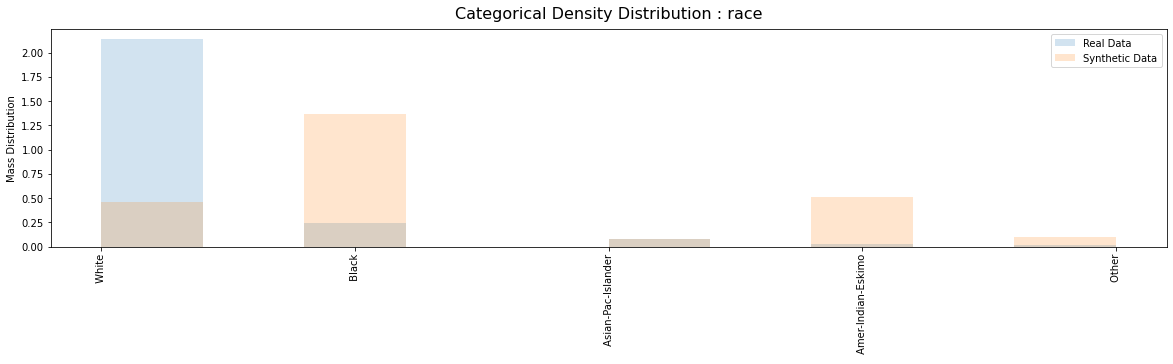

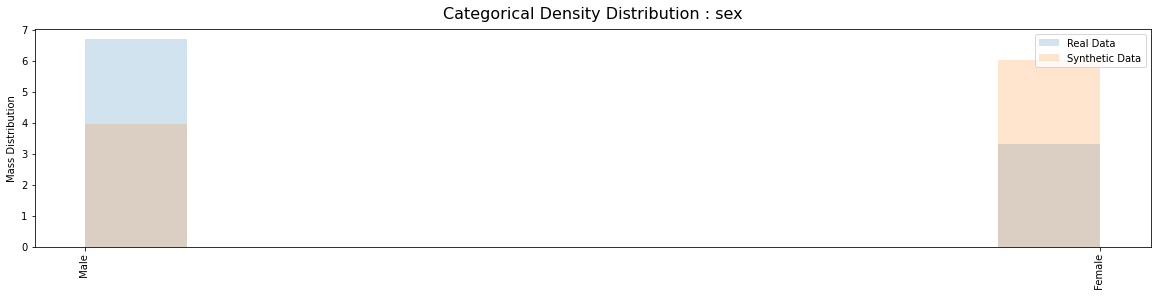

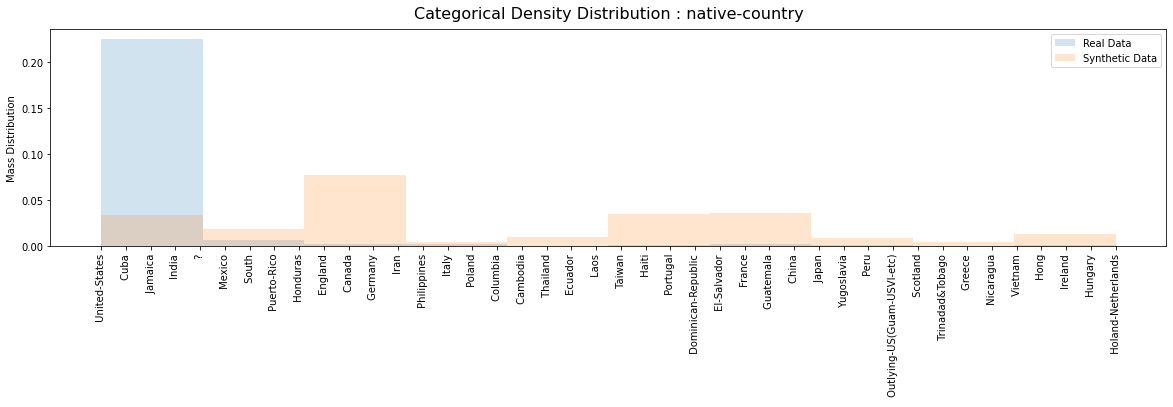

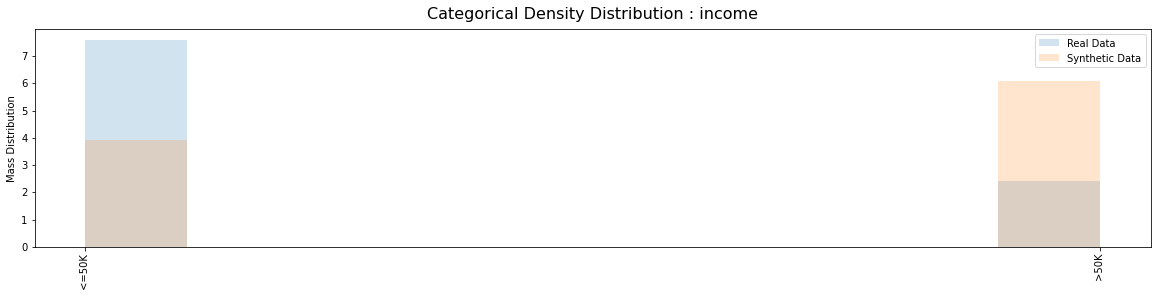

In [44]:
get_full_report(data, sample,discrete_columns,numeric_features)

#### Save model to disk

In [45]:
synth.save('F:/Users/Kaggle/wids/PrivateModelAdvAPI.pth')

#### 

### Fin ###